# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Проект: Определение стоимости автомобилей 

## Описание проекта

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. Ключевая функция приложения - возможность узнать рыночную стоимость своего автомобиля. 

Нашей задачей будет построить модель машинного обучения, которая сможет определять стоимость автомобиля на основе его технических характеристик, комплектации и данных о ценах аналогичных автомобилей.

## Цель проекта

Разработать модель машинного обучения для определения рыночной стоимости подержанных автомобилей, учитывая такие критерии, как:
- Качество предсказания цены
- Скорость обучения модели  
- Скорость выдачи предсказания модели

Это позволит сервису «Не бит, не крашен» предоставить пользователям востребованный функционал и повысить привлекательность своего приложения на рынке.

## Задачи проекта

1. Загрузить и подготовить данные для анализа и моделирования.
   - Изучить датасет, обработать пропуски и аномалии в данных.
   - Удалить неинформативные признаки.
   - Подготовить обучающие выборки.

2. Построить и обучить несколько моделей машинного обучения для предсказания цены автомобилей.  
   - Реализовать модель градиентного бустинга LightGBM.
   - Реализовать как минимум одну небустинговую модель.
   - Подобрать оптимальные гиперпараметры для каждой модели.

3. Проанализировать и сравнить модели по следующим характеристикам:
   - Время обучения
   - Время предсказания
   - Точность предсказания (RMSE)

4. Выбрать лучшую модель на основе критериев заказчика и проверить её качество на тестовой выборке.

## Данные

Для построения модели будут использоваться данные с характеристиками и ценами подержанных автомобилей из файла `autos.csv`. 

Набор данных содержит следующие признаки:

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя


Целевым признаком является `Price` - цена автомобиля в евро.

## Ожидаемый результат

В результате выполнения проекта мы получим:

1. Подготовленные данные для обучения моделей.

2. Несколько моделей машинного обучения для предсказания цены автомобилей, включая:
   - Модель градиентного бустинга LightGBM
   - Как минимум одну небустинговую модель
   - Оптимальные гиперпараметры для каждой модели

3. Анализ характеристик моделей:  
   - Время обучения
   - Время предсказания
   - Точность предсказания (RMSE < 2500)

4. Рекомендации по выбору лучшей модели для системы предсказания цены в приложении, учитывающие критерии заказчика.

</antArtifact>

## Подготовка данных

### Импорт библиотек

In [1]:
!pip install phik 
!pip install --upgrade scikit-learn


import time
import numpy as np
import pandas as pd
import os
import phik
import sklearn
import lightgbm as lgb



# Импорты для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Импорты для предобработки данных
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Импортируйте другие необходимые компоненты

# Импорты для построения моделей
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from time import time
# Импорты для оценки моделей
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Вспомогательные импорты
import gc
import time
import warnings


# Загрузка данных (пример с California Housing)
from sklearn.datasets import fetch_california_housing

display (f"Версия scikit-learn: {sklearn.__version__}") 

'Версия scikit-learn: 1.5.2'

### Загрузка данных

In [2]:
file_paths = ['/datasets/autos.csv', '/local/path/to/autos.csv']

for path in file_paths:
    if os.path.exists(path):
        data = pd.read_csv(path)
        break
else:
    raise FileNotFoundError("Файл данных не найден ни в одном из указанных расположений.")

# Первичный анализ данных
display(data.info())
display(data.describe())

# Проверка на пропуски в данных
null_counts = data.isnull().sum()
null_percentages = null_counts / len(data) * 100

display("Анализ пропусков в данных:")
display(pd.concat([null_counts, null_percentages], 
                axis=1, keys=['Количество пропусков', 'Процент пропусков']))

display("Количество записей для каждой категории")
display(data.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


'Анализ пропусков в данных:'

,Количество пропусков,Процент пропусков
DateCrawled,0,0.000000
Price,0,0.000000
VehicleType,37490,10.579368
RegistrationYear,0,0.000000
Gearbox,19833,5.596709
Power,0,0.000000
Model,19705,5.560588
Kilometer,0,0.000000
RegistrationMonth,0,0.000000
FuelType,32895,9.282697


'Количество записей для каждой категории'

DateCrawled          Price  VehicleType  RegistrationYear  Gearbox  Power  Model     Kilometer  RegistrationMonth  FuelType  Brand          Repaired  DateCreated          NumberOfPictures  PostalCode  LastSeen           
2016-03-28 00:56:10  1000   small        2002              manual   83     other     150000     1                  petrol    suzuki         no        2016-03-28 00:00:00  0                 66589       2016-03-28 08:46:21    2
2016-04-03 09:01:15  4699   coupe        2003              auto     218    clk       125000     6                  petrol    mercedes_benz  yes       2016-04-03 00:00:00  0                 75196       2016-04-07 09:44:54    2
2016-03-18 18:46:15  1999   wagon        2001              manual   131    passat    150000     7                  gasoline  volkswagen     no        2016-03-18 00:00:00  0                 36391       2016-03-18 18:46:15    2
2016-03-08 18:42:48  1799   coupe        1999              auto     193    clk       20000      7    

### Преобразование дат в числовые признаки

In [3]:
# Преобразование дат в числовые признаки
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'])
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['LastSeen'] = pd.to_datetime(data['LastSeen'])

# Подсчет распределения значений и процентов для столбцов с датами
display("Анализ распределения значений столбцов с датами:")

for col in ['DateCrawled', 'DateCreated', 'LastSeen']:
    value_counts = data[col].dt.date.value_counts()
    value_percentages = value_counts / len(data) * 100
    
    display(f"\n{col}")
    display(pd.concat([value_counts, value_percentages], 
                    axis=1, keys=['Количество', 'Процент']))

'Анализ распределения значений столбцов с датами:'

'\nDateCrawled'

,Количество,Процент
2016-04-03,13669,3.857279
2016-04-04,13272,3.745249
2016-03-12,12902,3.640838
2016-03-20,12885,3.636040
2016-03-14,12847,3.625317
2016-03-21,12667,3.574523
2016-03-07,12662,3.573112
2016-03-19,12536,3.537555
2016-03-28,12438,3.509901
2016-04-02,12391,3.496638


'\nDateCreated'

,Количество,Процент
2016-04-03,13719,3.871388
2016-04-04,13317,3.757947
2016-03-20,12918,3.645353
2016-03-12,12840,3.623342
2016-03-21,12691,3.581295
...,...,...
2015-12-06,1,0.000282
2015-03-20,1,0.000282
2014-03-10,1,0.000282
2016-01-06,1,0.000282


'\nLastSeen'

,Количество,Процент
2016-04-06,75616,21.338210
2016-04-07,44830,12.650655
2016-04-05,43901,12.388499
2016-03-17,10399,2.934512
2016-04-04,9172,2.588263
2016-04-03,9104,2.569073
2016-04-02,8968,2.530695
2016-03-31,8705,2.456479
2016-04-01,8623,2.433339
2016-03-30,8571,2.418665


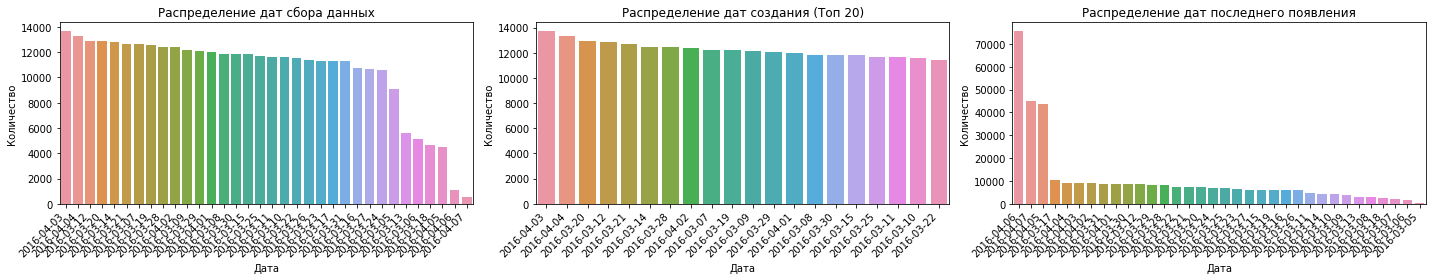

In [4]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
sns.countplot(x=data['DateCrawled'].dt.date, order=data['DateCrawled'].dt.date.value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение дат сбора данных')
plt.xlabel('Дата')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
sns.countplot(x=data['DateCreated'].dt.date, order=data['DateCreated'].dt.date.value_counts().index[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Распределение дат создания (Топ 20)')
plt.xlabel('Дата')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
sns.countplot(x=data['LastSeen'].dt.date, order=data['LastSeen'].dt.date.value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение дат последнего появления')
plt.xlabel('Дата')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Столбец LastSeen имеет явные выбросы для дат 2016-04-06, 2016-04-07 и 2016-04-05, где количество записей значительно превышает остальные даты.

### Создание новых признаков на основе дат

In [5]:
# Создание новых признаков на основе дат
data['CrawledYear'] = data['DateCrawled'].dt.year
data['CrawledMonth'] = data['DateCrawled'].dt.month
data['CrawledDay'] = data['DateCrawled'].dt.day
data['CreatedYear'] = data['DateCreated'].dt.year
data['CreatedMonth'] = data['DateCreated'].dt.month
data['CreatedDay'] = data['DateCreated'].dt.day
data['LastSeenYear'] = data['LastSeen'].dt.year
data['LastSeenMonth'] = data['LastSeen'].dt.month
data['LastSeenDay'] = data['LastSeen'].dt.day

# Преобразование признаков с типом datetime64 в числовой формат
data['CrawledYear'] = data['CrawledYear'].astype(int)
data['CrawledMonth'] = data['CrawledMonth'].astype(int)
data['CrawledDay'] = data['CrawledDay'].astype(int)
data['CreatedYear'] = data['CreatedYear'].astype(int)
data['CreatedMonth'] = data['CreatedMonth'].astype(int)
data['CreatedDay'] = data['CreatedDay'].astype(int)
data['LastSeenYear'] = data['LastSeenYear'].astype(int)
data['LastSeenMonth'] = data['LastSeenMonth'].astype(int)
data['LastSeenDay'] = data['LastSeenDay'].astype(int)

# Удаление оригинальных столбцов с датами
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis=1)

### Подсчет распределения значений и процентов для категориальных признаков

In [6]:
# Подсчет распределения значений и процентов для категориальных признаков
display("Анализ распределения значений категориальных признаков:")

for col in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']:
    value_counts = data[col].value_counts()
    value_percentages = value_counts / len(data) * 100
    
    display(f"\n{col}")
    display(pd.concat([value_counts, value_percentages], 
                    axis=1, keys=['Количество', 'Процент']))

'Анализ распределения значений категориальных признаков:'

'\nVehicleType'

,Количество,Процент
sedan,91457,25.808409
small,79831,22.527648
wagon,65166,18.389306
bus,28775,8.120067
convertible,20203,5.701119
coupe,16163,4.561065
suv,11996,3.385172
other,3288,0.927846


'\nGearbox'

,Количество,Процент
manual,268251,75.698213
auto,66285,18.705079


'\nModel'

,Количество,Процент
golf,29232,8.249029
other,24421,6.891404
3er,19761,5.576391
polo,13066,3.687117
corsa,12570,3.547150
...,...,...
serie_2,8,0.002258
serie_3,4,0.001129
rangerover,4,0.001129
range_rover_evoque,2,0.000564


'\nFuelType'

,Количество,Процент
petrol,216352,61.052744
gasoline,98720,27.857967
lpg,5310,1.498438
cng,565,0.159438
hybrid,233,0.065751
other,204,0.057567
electric,90,0.025397


'\nBrand'

,Количество,Процент
volkswagen,77013,21.732431
opel,39931,11.268198
bmw,36914,10.416825
mercedes_benz,32046,9.043116
audi,29456,8.312240
ford,25179,7.105305
renault,17927,5.058851
peugeot,10998,3.103545
fiat,9643,2.721175
seat,6907,1.949098


'\nRepaired'

,Количество,Процент
no,247161,69.746789
yes,36054,10.174141


### Распределение количества изображений в NumberOfPictures

In [7]:
display(data['NumberOfPictures'].value_counts())

0    354369
Name: NumberOfPictures, dtype: int64

### Обработка аномальных значений года регистрации

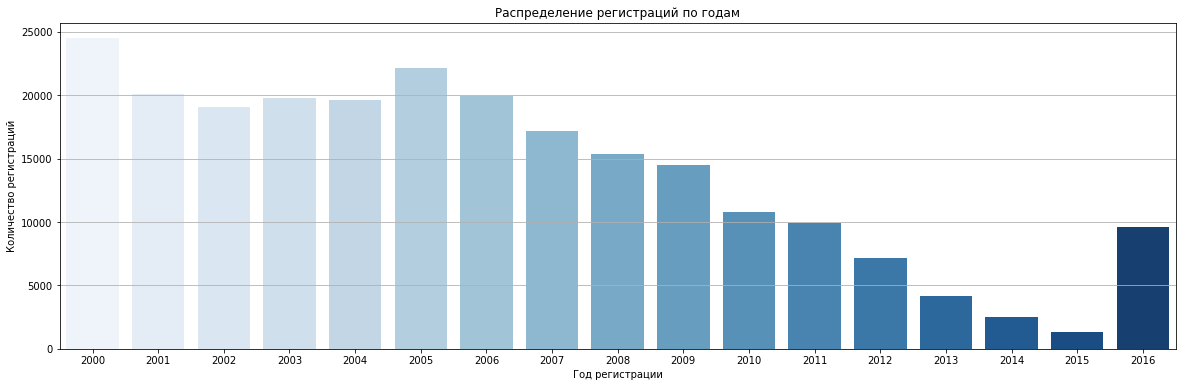

2015    1302
2016    9599
Name: RegistrationYear, dtype: int64

In [8]:
# Пример создания DataFrame
# data = pd.DataFrame({'RegistrationYear': [2000, 2001, 2002, 2003, ..., 2016]})

# Создаем график распределения
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='RegistrationYear', order=range(2000, 2017), palette='Blues')
plt.title('Распределение регистраций по годам')
plt.xlabel('Год регистрации')
plt.ylabel('Количество регистраций')
plt.grid(axis='y')

# Показать график
plt.show()

# Фильтруем данные с 2015 по 2016 год
filtered_data = data[(data['RegistrationYear'] >= 2015) & (data['RegistrationYear'] <= 2016)]

registration_counts = filtered_data['RegistrationYear'].value_counts().sort_index()

# Вывод количества регистраций
display(registration_counts)

In [9]:
unique_years = data['CrawledYear'].unique()
display(unique_years)

array([2016])

In [10]:
# Фильтруем данные, чтобы найти аномальные значения в столбце RegistrationYear
anomalies = data[(data['RegistrationYear'] < 1900) | (data['RegistrationYear'] > 2016)]

In [11]:
# Отображение аномальных значений перед удалением
display("Аномальные значения RegistrationYear:")
display(anomalies[['Brand', 'Model', 'RegistrationYear']].head(10)) 

# Печать количества строк с аномальными значениями
display("Количество аномальных значений RegistrationYear:", len(anomalies)) 

# Шаг 1: Удаление строк с годом регистрации меньше 1900 и больше 2016
data = data[(data['RegistrationYear'] >= 1900) & (data['RegistrationYear'] <= 2016)]

# Шаг 2: Проверка, остались ли аномальные значения
anomalies_after_removal = data[(data['RegistrationYear'] < 1900) | (data['RegistrationYear'] > 2016)]
display(f"Количество аномальных значений RegistrationYear после удаления: {len(anomalies_after_removal)}")

'Аномальные значения RegistrationYear:'

,Brand,Model,RegistrationYear
22,opel,meriva,2018
26,citroen,c4,2017
48,volkswagen,golf,2017
51,fiat,punto,2017
57,seat,other,2018
65,opel,astra,2017
111,volkswagen,golf,2017
155,kia,sportage,2017
163,opel,astra,2018
196,renault,twingo,2018


'Количество аномальных значений RegistrationYear:'

14596

'Количество аномальных значений RegistrationYear после удаления: 0'

### Создание группировки для нахождения моды по комбинации 'Brand', 'VehicleType' и 'RegistrationYear'


In [12]:
# Шаг 1: Создание группировки для нахождения моды по комбинации 'Brand', 'VehicleType' и 'RegistrationYear'
model_mode_by_group = data.groupby(['Brand', 'VehicleType', 'RegistrationYear'])['Model'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()

# Шаг 2: Оптимизация замены 'other' через метод .map()
# Функция для замены значений 'other' на моду, если таковая имеется
def replace_other_model_optimized(df, mode_dict):
    # Генерация ключей для строк
    keys = df[['Brand', 'VehicleType', 'RegistrationYear']].apply(tuple, axis=1)
    # Применение маппинга для замены 'other'
    df['Model'] = df.apply(lambda row: mode_dict.get((row['Brand'], row['VehicleType'], row['RegistrationYear']), row['Model']) if row['Model'] == 'other' else row['Model'], axis=1)

# Шаг 3: Применение функции для замены 'other' на конкретные значения
replace_other_model_optimized(data, model_mode_by_group)

# Шаг 4: Проверка на наличие оставшихся значений 'other' после замены
remaining_others = data['Model'].value_counts().get('other', 0)
display(f"Количество оставшихся значений 'other' в столбце 'Model': {remaining_others}")

"Количество оставшихся значений 'other' в столбце 'Model': 15832"

### Замена аномальных значений мощности автомобилей

In [13]:
# Найдём наиболее частое значение 'Power' для каждой модели автомобиля
most_frequent_power_by_model = data.groupby('Model')['Power'].agg(lambda x: x.value_counts().idxmax())

# Найдём наиболее частое значение 'Power' для каждой комбинации 'Brand' и 'VehicleType'
most_frequent_power_by_brand_vehicle_type = data.groupby(['Brand', 'VehicleType'])['Power'].agg(lambda x: x.value_counts().idxmax())

# Функция для замены значений мощности, выходящих за пределы (меньше 50 или больше 500),
# на наиболее частое значение мощности для модели, а если модель не указана — для группы бренда и типа кузова
def replace_outliers(row):
    if row['Power'] > 500 or row['Power'] < 50:
        if pd.notnull(row['Model']):
            # Если модель указана, заменяем на наиболее частое значение мощности для модели
            return most_frequent_power_by_model.get(row['Model'], row['Power'])
        else:
            # Если модель не указана, заменяем на наиболее частое значение мощности для бренда и типа кузова
            return most_frequent_power_by_brand_vehicle_type.get((row['Brand'], row['VehicleType']), row['Power'])
    else:
        return row['Power']

# Применим функцию для замены аномалий в 'Power'
data['Power'] = data.apply(replace_outliers, axis=1)

# Проверим, что значения были заменены
display(data[data['Power'] > 500].head(40))  # Должно быть пусто, если замены прошли успешно
display(data[data['Power'] < 50].head(40))   # Должно быть пусто, если замены прошли успешно

# Количество строк с Power равным 0
count_zero_power = data['Power'][data['Power'] == 0].count() 
display(f"Количество строк с Power равным 0: {count_zero_power}")

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,PostalCode,CrawledYear,CrawledMonth,CrawledDay,CreatedYear,CreatedMonth,CreatedDay,LastSeenYear,LastSeenMonth,LastSeenDay
104463,11399,NaN,1995,manual,1995,NaN,150000,12,gasoline,bmw,...,90459,2016,3,28,2016,3,28,2016,4,7
259983,0,NaN,2000,NaN,900,NaN,150000,0,NaN,sonstige_autos,...,57080,2016,3,24,2016,3,24,2016,4,6
289174,7799,NaN,2004,auto,2004,NaN,150000,6,petrol,mercedes_benz,...,55252,2016,4,3,2016,4,3,2016,4,5


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,PostalCode,CrawledYear,CrawledMonth,CrawledDay,CreatedYear,CreatedMonth,CreatedDay,LastSeenYear,LastSeenMonth,LastSeenDay
154,0,NaN,2006,NaN,0,other,5000,0,NaN,fiat,...,44867,2016,3,22,2016,3,22,2016,4,6
177,300,bus,1997,manual,0,other,150000,7,petrol,opel,...,24147,2016,3,22,2016,3,22,2016,3,28
232,1000,suv,1982,manual,0,other,150000,11,petrol,suzuki,...,56337,2016,3,12,2016,3,12,2016,3,13
243,10200,coupe,2008,manual,0,other,90000,6,petrol,nissan,...,71131,2016,3,6,2016,3,6,2016,4,6
260,450,NaN,2016,manual,0,NaN,150000,3,petrol,mitsubishi,...,59302,2016,4,4,2016,4,4,2016,4,6
306,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,...,6493,2016,3,21,2016,3,21,2016,3,24
339,3550,sedan,1993,manual,0,other,125000,11,petrol,chevrolet,...,54634,2016,3,9,2016,3,9,2016,3,14
407,2200,bus,2000,manual,0,other,150000,3,gasoline,peugeot,...,54296,2016,3,22,2016,3,22,2016,3,26
421,350,wagon,1998,manual,0,6_reihe,150000,0,petrol,mazda,...,54655,2016,3,8,2016,3,8,2016,4,7
431,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,...,90562,2016,3,20,2016,3,20,2016,4,3


'Количество строк с Power равным 0: 7486'

### Оптимизация замены значений 'other' в модели

In [14]:
# Шаг 1: Создание группировки для нахождения моды по комбинации 'Brand' и 'Power'
model_mode_by_brand_power = data.groupby(['Brand', 'Power'])['Model'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()

# Шаг 2: Оптимизация замены 'other' через метод .map()
# Функция для замены значений 'other' на моду, если таковая имеется
def replace_other_model_by_brand_power(df, mode_dict):
    # Применение замены на основе группировки 'Brand' и 'Power'
    df['Model'] = df.apply(lambda row: mode_dict.get((row['Brand'], row['Power']), row['Model']) if row['Model'] == 'other' else row['Model'], axis=1)

# Шаг 3: Применение функции для замены 'other' на моду по 'Brand' и 'Power'
replace_other_model_by_brand_power(data, model_mode_by_brand_power)

# Шаг 4: Проверка на наличие значений 'other' после замены
remaining_others = data['Model'].value_counts().get('other', 0)
display(f"Количество оставшихся значений 'other' в столбце 'Model': {remaining_others}")

"Количество оставшихся значений 'other' в столбце 'Model': 9278"

### Замена значений в столбце 'Model'

In [15]:
# Шаг 1: Создание группировки для нахождения моды по 'Brand'
model_mode_by_brand = data.groupby('Brand')['Model'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()

# Шаг 2: Функция для замены значений 'other' на моду по 'Brand'
def replace_other_model_by_brand(df, mode_dict):
    # Применение замены на основе группировки по 'Brand'
    df['Model'] = df.apply(lambda row: mode_dict.get(row['Brand'], row['Model']) if row['Model'] == 'other' else row['Model'], axis=1)

# Шаг 3: Применение функции для замены 'other' на моду по 'Brand'
replace_other_model_by_brand(data, model_mode_by_brand)

# Шаг 4: Проверка на наличие оставшихся значений 'other'
remaining_others = data['Model'].value_counts().get('other', 0)
display(f"Количество оставшихся значений 'other' в столбце 'Model': {remaining_others}")

"Количество оставшихся значений 'other' в столбце 'Model': 1476"

### Топ-10 брендов с моделью 'other'

In [16]:
# Найдем 10 самых популярных брендов, где Model = 'other'
top_10_brands_with_other = data[data['Model'] == 'other']['Brand'].value_counts().nlargest(10)

display("10 самых популярных брендов с 'other' в столбце 'Model':")
display(top_10_brands_with_other) 

"10 самых популярных брендов с 'other' в столбце 'Model':"

chevrolet    758
rover        378
saab         340
Name: Brand, dtype: int64

### Заполнение Пропусков в Модели Авто

In [17]:
# Создание группировки для модального значения 'Model' на основе 'Brand', 'VehicleType' и 'RegistrationYear'
model_mode_by_group = data.groupby(['Brand', 'VehicleType', 'RegistrationYear'
                                   ])['Model'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()

# Функция для замены пропусков на основе предопределенного словаря
def fill_model(row):
    key = (row['Brand'], row['VehicleType'], row['RegistrationYear'])
    if pd.isnull(row['Model']):
        return model_mode_by_group.get(key, 'Unknown')
    else:
        return row['Model']

# Применение функции к данным для заполнения пропусков
data['Model'] = data.apply(fill_model, axis=1)

# Проверка на оставшиеся пропуски
model_null_count_after = data['Model'].isnull().sum()
display(f"Количество пропусков в столбце 'Model' после заполнения: {model_null_count_after}")

"Количество пропусков в столбце 'Model' после заполнения: 0"

### Анализ пропусков: 'Unknown' в данных

In [18]:
# Подсчитываем количество строк с 'Unknown' в каждой колонке
unknown_counts = data.isin(['Unknown']).sum()

# Подсчитываем общее количество строк в DataFrame
total_rows = len(data)

# Вычисляем процент строк с 'Unknown' для каждой колонки
unknown_percentages = (unknown_counts / total_rows) * 100

# Выводим результаты
display("Количество строк с 'Unknown' в каждой колонке:")
display(unknown_counts)
display("\nПроцент строк с 'Unknown' в каждой колонке:")
display(unknown_percentages) 

"Количество строк с 'Unknown' в каждой колонке:"

Price                   0
VehicleType             0
RegistrationYear        0
Gearbox                 0
Power                   0
Model                7215
Kilometer               0
RegistrationMonth       0
FuelType                0
Brand                   0
Repaired                0
NumberOfPictures        0
PostalCode              0
CrawledYear             0
CrawledMonth            0
CrawledDay              0
CreatedYear             0
CreatedMonth            0
CreatedDay              0
LastSeenYear            0
LastSeenMonth           0
LastSeenDay             0
dtype: int64

"\nПроцент строк с 'Unknown' в каждой колонке:"

Price                0.000000
VehicleType          0.000000
RegistrationYear     0.000000
Gearbox              0.000000
Power                0.000000
Model                2.123477
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.000000
Brand                0.000000
Repaired             0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
CrawledYear          0.000000
CrawledMonth         0.000000
CrawledDay           0.000000
CreatedYear          0.000000
CreatedMonth         0.000000
CreatedDay           0.000000
LastSeenYear         0.000000
LastSeenMonth        0.000000
LastSeenDay          0.000000
dtype: float64

### Заполнение пропусков в типе топлива

In [19]:
most_frequent_fuel_by_model = data.groupby('Model')['FuelType'].apply(lambda x: x.mode()[0])

def fill_fuel_type(row):
    if pd.isnull(row['FuelType']):
        return most_frequent_fuel_by_model.get(row['Model'], 'Unknown')
    return row['FuelType']

data['FuelType'] = data.apply(fill_fuel_type, axis=1)

### Анализ пропусков в Gearbox по моделям

In [20]:
# Группируем данные по модели автомобиля и считаем количество пропусков в столбце Gearbox
gearbox_null_counts_by_model = data.groupby('Model')['Gearbox'].apply(lambda x: x.isnull().sum())

# Вычисляем общее количество пропусков в столбце Gearbox
total_gearbox_null_count = data['Gearbox'].isnull().sum()

# Вычисляем процент пропусков для каждой модели относительно общего количества пропусков
gearbox_null_percentage_by_model = gearbox_null_counts_by_model / total_gearbox_null_count * 100

# Создаем DataFrame с количеством и процентом пропусков для каждой модели
gearbox_null_stats_by_model = pd.DataFrame({
    'Количество пропусков': gearbox_null_counts_by_model,
    'Процент пропусков': gearbox_null_percentage_by_model
})

# Сортируем DataFrame по убыванию количества пропусков
gearbox_null_stats_by_model = gearbox_null_stats_by_model.sort_values(by='Количество пропусков', ascending=False)

# Выводим таблицу с результатами
display("Количество и процент пропусков в столбце Gearbox для каждой модели автомобиля:")
display(gearbox_null_stats_by_model)

'Количество и процент пропусков в столбце Gearbox для каждой модели автомобиля:'

,Количество пропусков,Процент пропусков
Model,,
Unknown,2865,15.997543
golf,1367,7.633034
fortwo,787,4.394439
corsa,762,4.254844
3er,729,4.070579
...,...,...
q5,0,0.000000
q3,0,0.000000
amarok,0,0.000000


### Заполнение Пропусков в VehicleType по Группам

In [21]:
# Групповое заполнение пропусков в 'VehicleType' на основе 'Brand' и 'Power'
vehicle_type_mode_by_group = data.groupby(['Brand', 'Power'])['VehicleType'].apply(lambda x: x.mode()[0] if x.mode().size > 0 else 'Unknown')

# Функция для заполнения пропусков в 'VehicleType' на основе соответствующей группы
def fill_vehicle_type(row):
    if pd.isnull(row['VehicleType']):
        brand = row['Brand']
        power = row['Power']
        
        if (brand, power) in vehicle_type_mode_by_group.index:
            return vehicle_type_mode_by_group[(brand, power)]
        else:
            return 'Unknown'
    else:
        return row['VehicleType']

# Заполнение пропусков в столбце 'VehicleType' на основе соответствующей группы
data['VehicleType'] = data.apply(fill_vehicle_type, axis=1)

# Проверка наличия пропусков после заполнения
vehicle_type_null_count_after = data['VehicleType'].isnull().sum()

display(f"Количество пропусков в столбце 'VehicleType' после заполнения: {vehicle_type_null_count_after}")

"Количество пропусков в столбце 'VehicleType' после заполнения: 0"

###  Заполнение Пропусков Gearbox по Моделям

In [22]:
# Находим наиболее частое значение Gearbox для каждой модели автомобиля
gearbox_mode_by_model = data.groupby('Model')['Gearbox'].apply(lambda x: x.mode()[0] if x.mode().size > 0 else 'unknown')

# Функция для заполнения пропусков в Gearbox на основе модели автомобиля
def fill_gearbox(row):
    if pd.isnull(row['Gearbox']):
        if pd.notnull(row['Model']):  # Проверяем, что значение 'Model' не является пропущенным (NaN)
            return gearbox_mode_by_model[row['Model']]
        else:
            return 'unknown'  # Если значение 'Model' пропущено, возвращаем 'unknown' или любое другое подходящее значение
    else:
        return row['Gearbox']

# Заполняем пропуски в столбце Gearbox на основе модели автомобиля
data['Gearbox'] = data.apply(fill_gearbox, axis=1)

# Проверяем наличие пропусков после заполнения
gearbox_null_count_after = data['Gearbox'].isnull().sum()

display(f"Количество пропусков в столбце Gearbox после заполнения: {gearbox_null_count_after}")

'Количество пропусков в столбце Gearbox после заполнения: 0'

### Анализ распределения километража данных

count    339773.000000
mean     128086.119262
std       37895.647481
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64

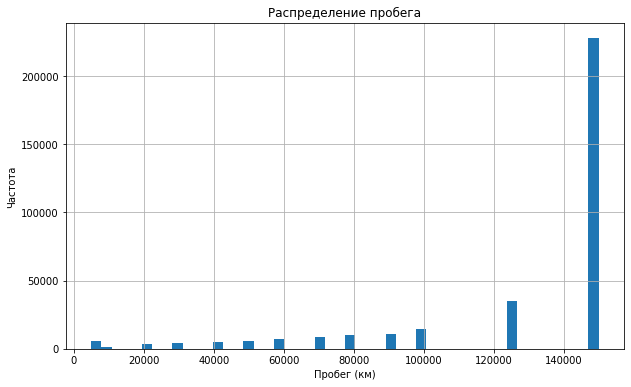

In [23]:
display(data['Kilometer'].describe())

# Гистограмма для визуализации распределения
plt.figure(figsize=(10, 6))
data['Kilometer'].hist(bins=50)
plt.xlabel('Пробег (км)')
plt.ylabel('Частота')
plt.title('Распределение пробега')
plt.show()

### Анализ Цен Автомобилей по Пробегу

High      262676
Medium     51014
Low        26083
Name: KilometerGroup, dtype: int64

'\nГруппа пробега: High'

count    262676.000000
mean       3633.975571
std        3842.439893
min           0.000000
25%         990.000000
50%        2200.000000
75%        4950.000000
max       20000.000000
Name: Price, dtype: float64

'\nГруппа пробега: Medium'

count    51014.000000
mean      7093.896891
std       5217.942789
min          0.000000
25%       2800.000000
50%       5990.000000
75%      10500.000000
max      20000.000000
Name: Price, dtype: float64

'\nГруппа пробега: Low'

count    26083.000000
mean      7774.538857
std       5987.467371
min          0.000000
25%       2000.000000
50%       7000.000000
75%      12500.000000
max      20000.000000
Name: Price, dtype: float64

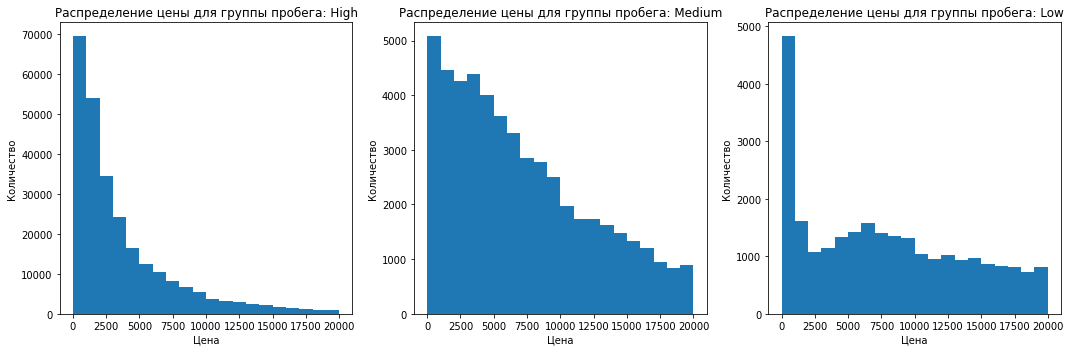

In [24]:
# Создаем функцию для определения группы пробега
def kilometer_group(kilometer):
    if kilometer <= 50000:
        return 'Low'
    elif 50000 < kilometer <= 100000:
        return 'Medium'
    else:
        return 'High'

# Применяем функцию к столбцу 'Kilometer' для создания нового признака 'KilometerGroup'
data['KilometerGroup'] = data['Kilometer'].apply(kilometer_group)

# Выводим количество автомобилей в каждой группе
display(data['KilometerGroup'].value_counts())

# Анализируем распределение цены для каждой группы пробега
for group in data['KilometerGroup'].unique():
    display(f"\nГруппа пробега: {group}")
    display(data[data['KilometerGroup'] == group]['Price'].describe())

# Визуализируем распределение цены для каждой группы
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, group in enumerate(data['KilometerGroup'].unique()):
    axs[i].hist(data[data['KilometerGroup'] == group]['Price'], bins=20)
    axs[i].set_title(f'Распределение цены для группы пробега: {group}')
    axs[i].set_xlabel('Цена')
    axs[i].set_ylabel('Количество')
plt.tight_layout()
plt.show()

### Анализ пропусков в данных после заполнения

In [25]:
# Проверяем наличие пропусков после заполнения
null_counts_after = data.isnull().sum()
null_percentages_after = null_counts_after / len(data) * 100

display("Анализ пропусков в данных после заполнения:")
display(pd.concat([null_counts_after, null_percentages_after], 
                axis=1, keys=['Количество пропусков', 'Процент пропусков']))

'Анализ пропусков в данных после заполнения:'

,Количество пропусков,Процент пропусков
Price,0,0.000000
VehicleType,0,0.000000
RegistrationYear,0,0.000000
Gearbox,0,0.000000
Power,0,0.000000
Model,0,0.000000
Kilometer,0,0.000000
RegistrationMonth,0,0.000000
FuelType,0,0.000000
Brand,0,0.000000


### Анализ распределения числовых признаков

In [26]:
numeric_columns = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode', 'CrawledYear', 'CrawledMonth', 'CrawledDay', 'CreatedYear', 'CreatedMonth', 'CreatedDay', 'LastSeenYear', 'LastSeenMonth', 'LastSeenDay']

display("Анализ распределения значений числовых признаков:")

for col in numeric_columns:
    value_counts = data[col].value_counts()
    value_percentages = value_counts / len(data) * 100
    
    display(f"\n{col}")
    display(pd.concat([value_counts, value_percentages], axis=1, keys=['Количество', 'Процент']).head(10))
    display("...")

'Анализ распределения значений числовых признаков:'

'\nPrice'

,Количество,Процент
0,10008,2.945496
500,5468,1.609310
1500,5093,1.498942
1000,4366,1.284976
1200,4332,1.274969
2500,4244,1.249069
3500,3653,1.075130
600,3636,1.070126
800,3581,1.053939
2000,3239,0.953284


'...'

'\nRegistrationYear'

,Количество,Процент
2000,24490,7.207753
1999,22728,6.689172
2005,22109,6.506991
2001,20124,5.922778
2006,19900,5.856851
2003,19763,5.816530
2004,19611,5.771795
2002,19092,5.619046
1998,17899,5.267929
2007,17183,5.057200


'...'

'\nPower'

,Количество,Процент
75,28029,8.249331
60,23281,6.851928
150,16863,4.963019
140,14407,4.240184
101,14114,4.153950
90,12945,3.809897
116,12302,3.620653
105,10420,3.066753
170,10410,3.063810
0,7486,2.203236


'...'

'\nKilometer'

,Количество,Процент
150000,227626,66.993552
125000,35050,10.315711
100000,14415,4.242538
90000,11197,3.295435
80000,9755,2.871034
70000,8364,2.461644
60000,7283,2.143490
50000,6068,1.785898
5000,5929,1.744989
40000,4817,1.417711


'...'

'\nRegistrationMonth'

,Количество,Процент
0,33616,9.893664
3,33193,9.769169
6,30389,8.943913
4,28188,8.296127
5,28130,8.279057
7,26301,7.740756
10,25255,7.432904
12,23399,6.886657
11,23381,6.881359
9,23083,6.793653


'...'

'\nNumberOfPictures'

,Количество,Процент
0,339773,100.0


'...'

'\nPostalCode'

,Количество,Процент
10115,815,0.239866
65428,575,0.169231
66333,326,0.095946
44145,300,0.088294
32257,299,0.088000
52525,296,0.087117
38518,282,0.082997
78224,278,0.081819
13357,275,0.080936
60311,273,0.080348


'...'

'\nCrawledYear'

,Количество,Процент
2016,339773,100.0


'...'

'\nCrawledMonth'

,Количество,Процент
3,284595,83.760334
4,55178,16.239666


'...'

'\nCrawledDay'

,Количество,Процент
3,13129,3.864050
5,13058,3.843154
4,12751,3.752800
7,12726,3.745442
12,12379,3.643315
20,12379,3.643315
14,12277,3.613295
21,12153,3.576800
19,11995,3.530298
28,11902,3.502927


'...'

'\nCreatedYear'

,Количество,Процент
2016,339747,99.992348
2015,25,0.007358
2014,1,0.000294


'...'

'\nCreatedMonth'

,Количество,Процент
3,284530,83.741204
4,54768,16.118997
2,386,0.113605
1,65,0.019130
11,9,0.002649
12,9,0.002649
9,3,0.000883
8,2,0.000589
6,1,0.000294


'...'

'\nCreatedDay'

,Количество,Процент
3,13571,3.994137
4,13368,3.934391
20,12425,3.656853
12,12341,3.632131
7,12312,3.623596
21,12201,3.590927
28,12000,3.531770
14,11940,3.514111
2,11886,3.498218
5,11793,3.470847


'...'

'\nLastSeenYear'

,Количество,Процент
2016,339773,100.0


'...'

'\nLastSeenMonth'

,Количество,Процент
4,192830,56.752597
3,146943,43.247403


'...'

'\nLastSeenDay'

,Количество,Процент
6,74462,21.915220
7,45172,13.294759
5,42714,12.571334
17,9900,2.913710
4,8763,2.579075
3,8681,2.554941
2,8529,2.510205
31,8324,2.449871
1,8243,2.426031
30,8185,2.408961


'...'

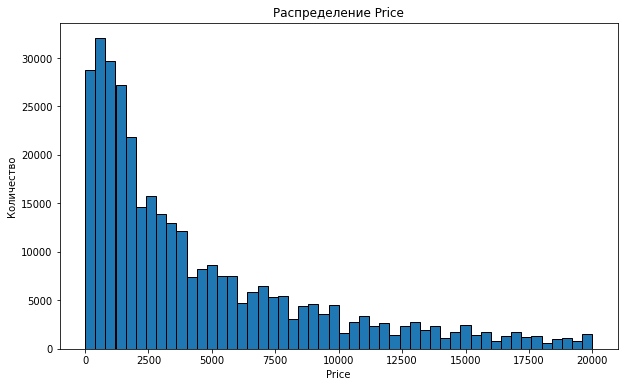

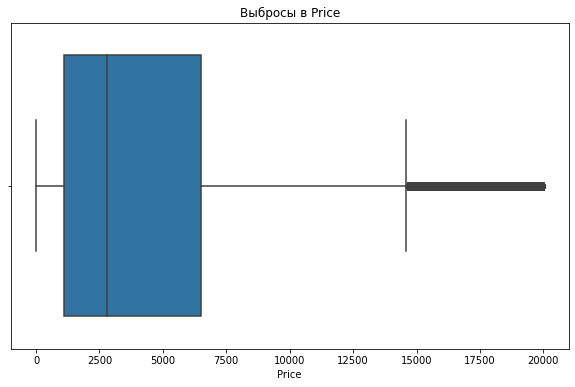

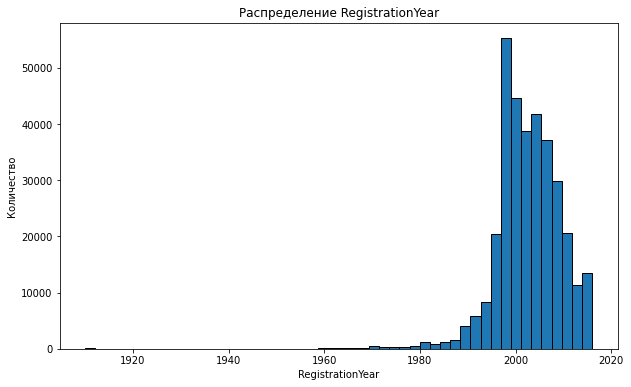

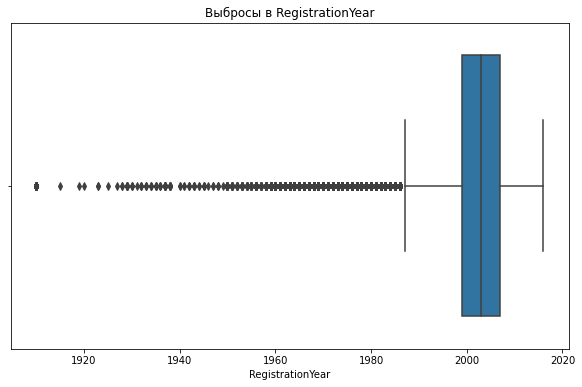

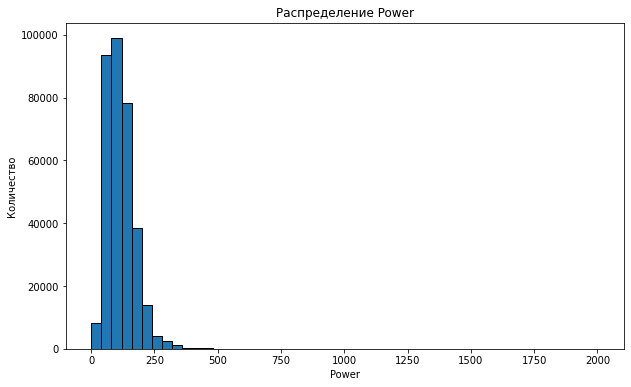

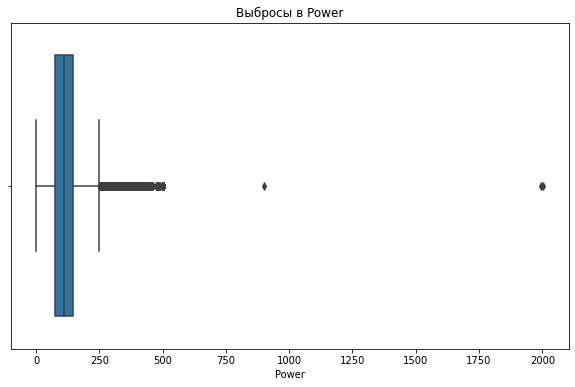

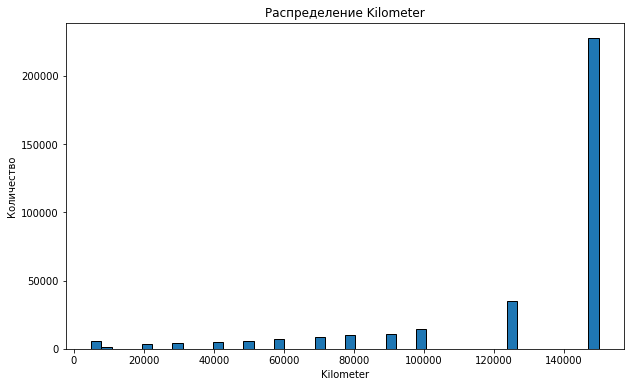

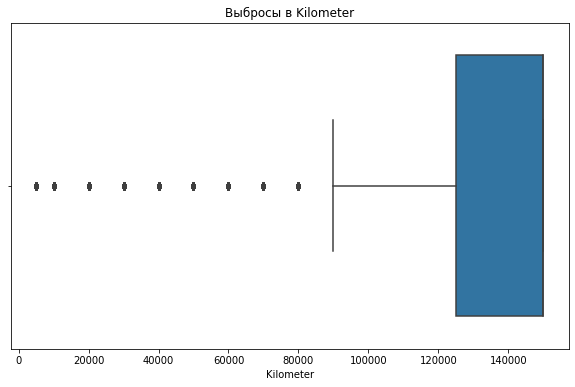

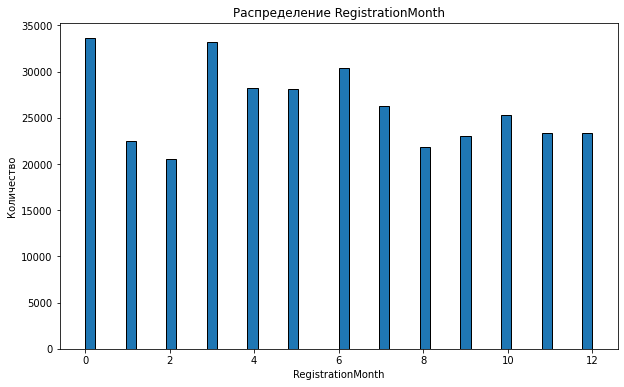

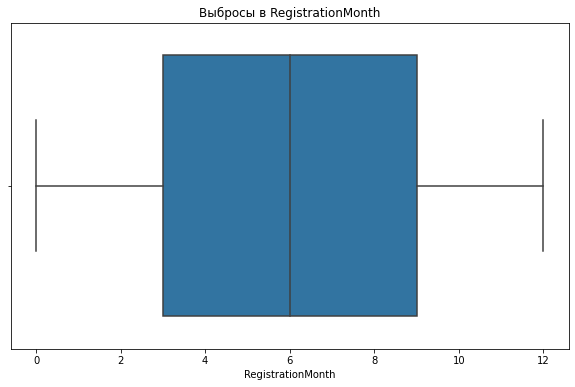

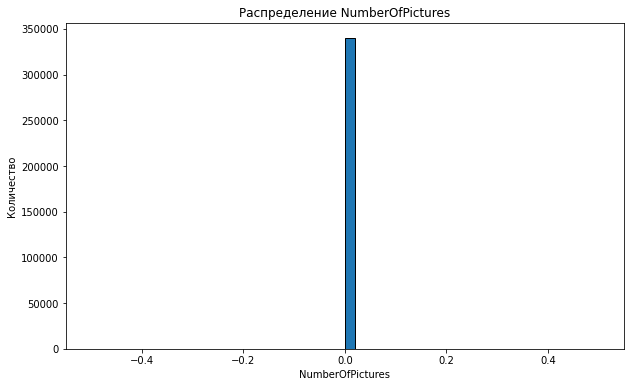

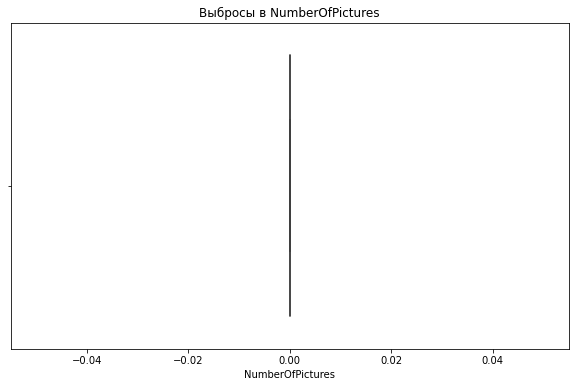

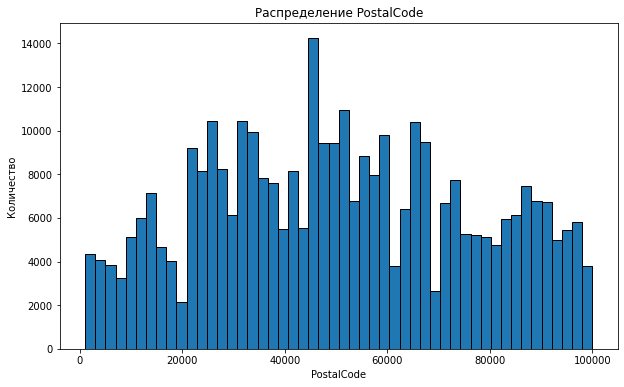

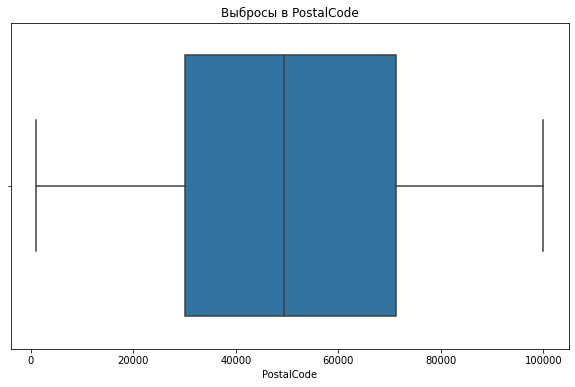

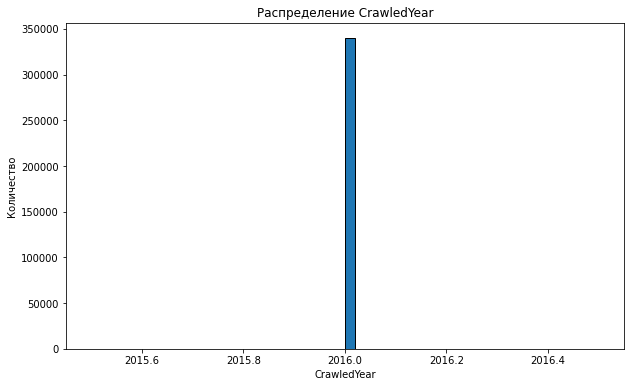

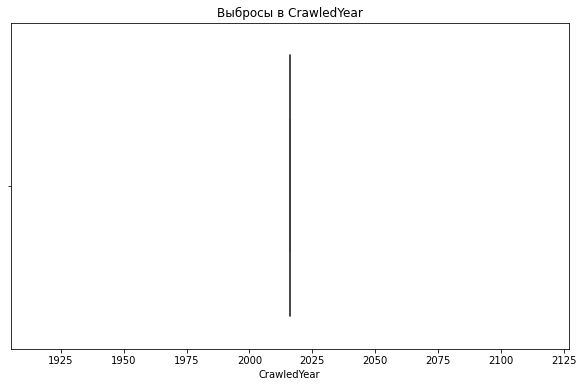

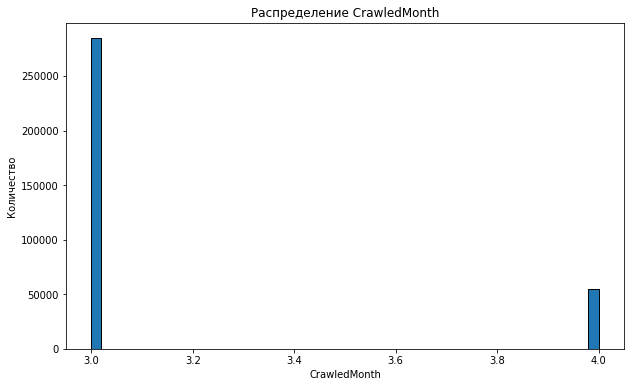

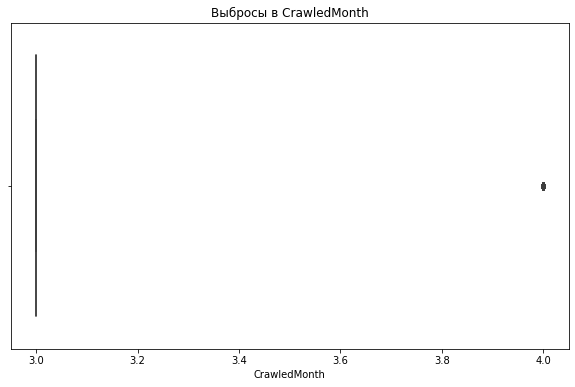

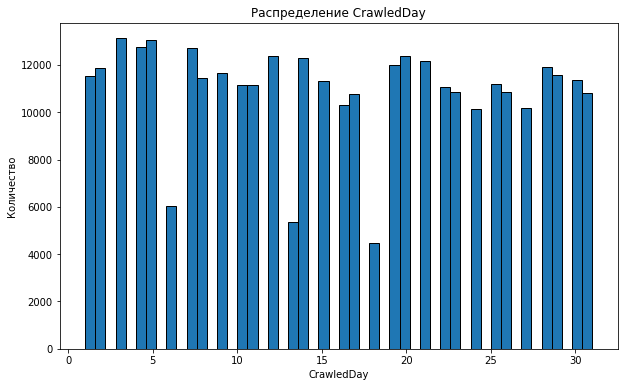

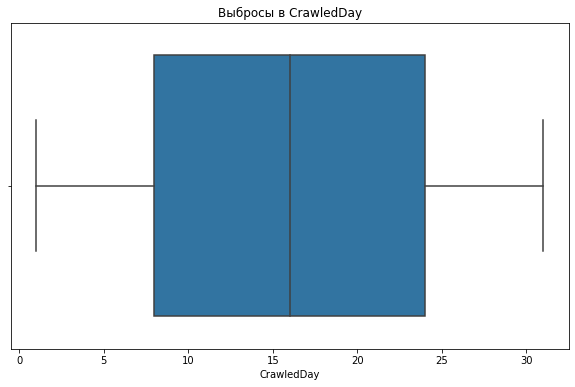

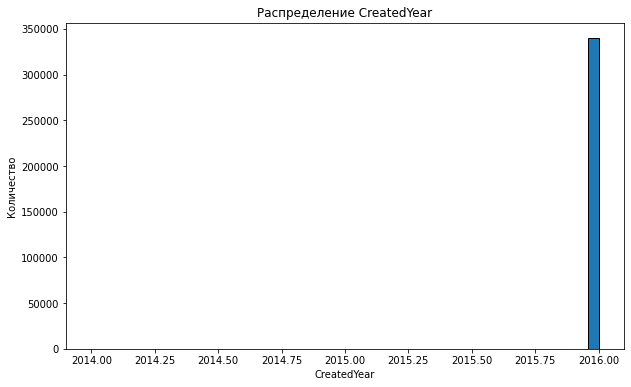

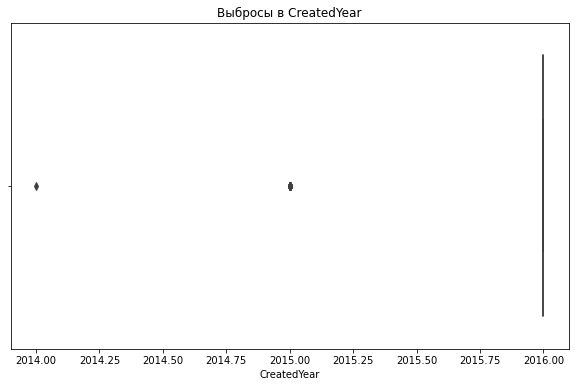

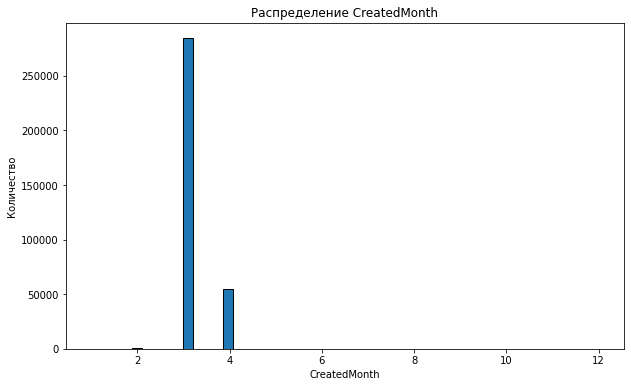

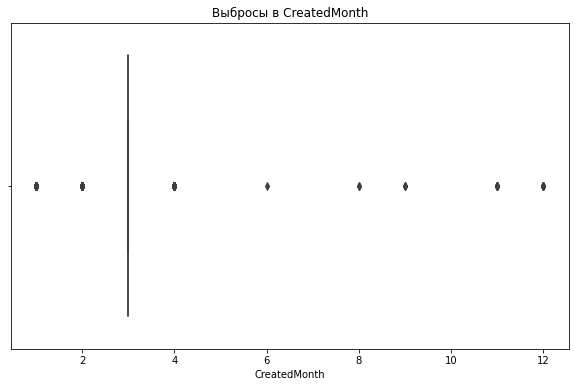

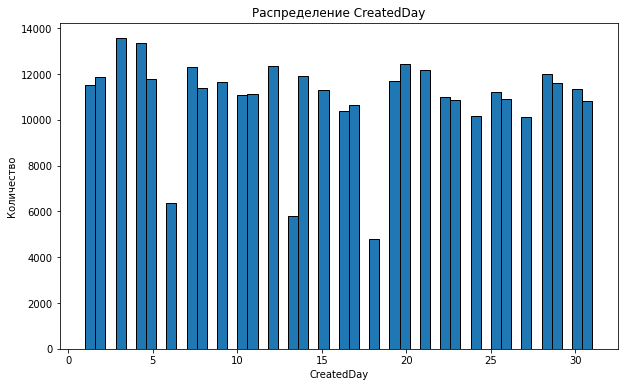

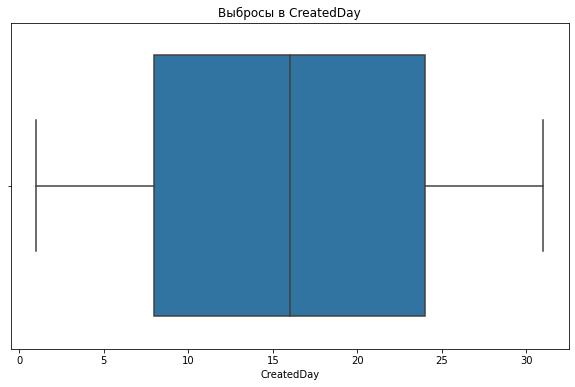

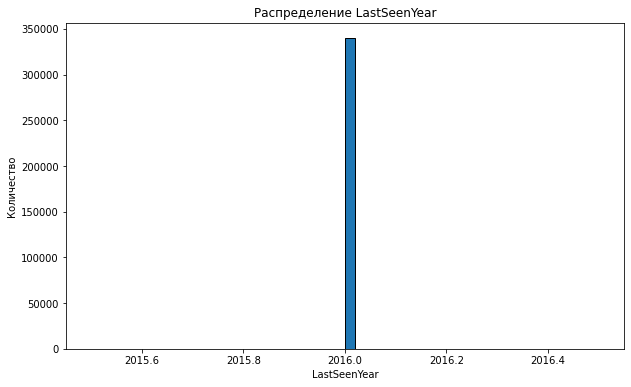

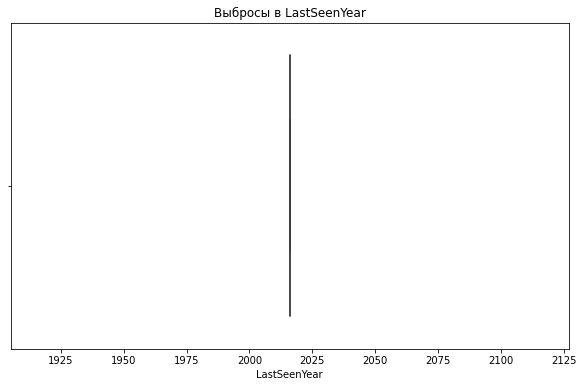

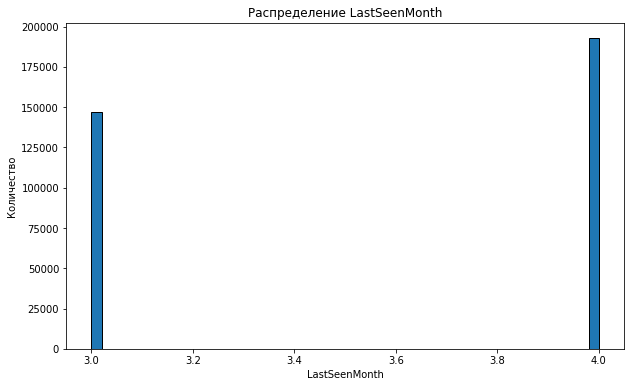

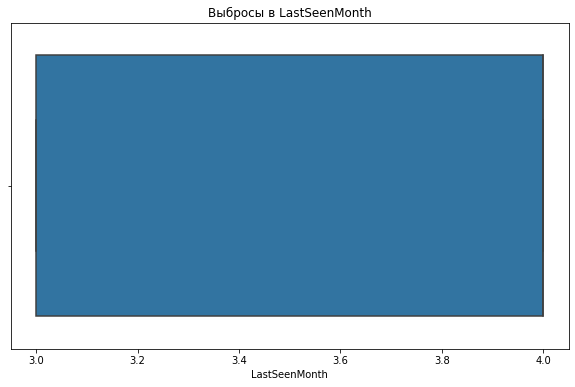

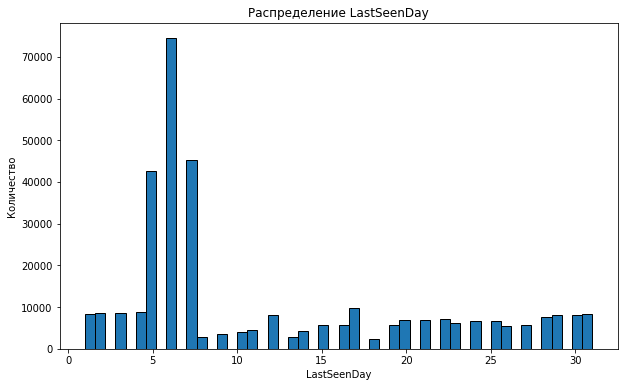

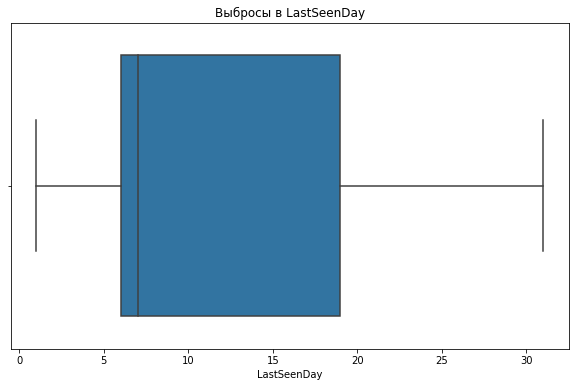

In [27]:
for col in numeric_columns:
    # Гистограмма распределения
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], bins=50, edgecolor='black')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()
    
    # График "ящик с усами" (box plot)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Выбросы в {col}')
    plt.xlabel(col)
    plt.show()

### Анализ моделей с нулевым Power

In [28]:

# 1. Фильтруем данные, где Power равен 0
data_power_zero = data[data['Power'] == 0]

# 2. Считаем количество вхождений каждой модели в отфильтрованных данных
model_counts = data_power_zero['Model'].value_counts()

# 3. Выбираем 10 самых популярных моделей
top_10_models = model_counts.nlargest(10)

# 4. Создаем таблицу
table = pd.DataFrame({'Model': top_10_models.index, 'Count': top_10_models.values})

# 5. Выводим таблицу
display("10 самых популярных моделей с Power равным 0:")
display(table) 

'10 самых популярных моделей с Power равным 0:'

,Model,Count
0,Unknown,3511
1,megane,471
2,kaefer,423
3,berlingo,323
4,punto,255
5,c_klasse,225
6,6_reihe,221
7,other,201
8,focus,166
9,swift,140


### Анализ распределения цен автомобилей

In [29]:
# Группировка по цене с шагом 100 до максимума 5000
bins = list(range(0, 5100, 100))  # шаг 100 до 5000 включительно
labels = [f'{i}-{i+99}' for i in range(0, 5000, 100)]  # Создаем метки для групп

# Создание столбца для группировки
data['PriceGroup'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# Подсчет количества машин в каждой группе
grouped_data = data['PriceGroup'].value_counts().sort_index()

# Подсчет процента машин в каждой группе
total_cars = len(data)
grouped_percentage = (grouped_data / total_cars) * 100

# Подсчет количества машин с ценой выше 5000
above_5000_count = data[data['Price'] > 5000].shape[0]
above_5000_percentage = (above_5000_count / total_cars) * 100

# Вывод результатов
grouped_df = pd.DataFrame({
    'Количество машин': grouped_data,
    'Процент от общего числа машин': grouped_percentage
})

display("Распределение машин по группам цен (с шагом 100 до 5000):")
display(grouped_df)
display(f"\nКоличество машин с ценой выше 5000: {above_5000_count}")
display(f"Процент машин с ценой выше 5000: {above_5000_percentage:.2f}%")

'Распределение машин по группам цен (с шагом 100 до 5000):'

,Количество машин,Процент от общего числа машин
0-99,12448,3.663622
100-199,4073,1.198742
200-299,5570,1.639330
300-399,6661,1.960427
400-499,5771,1.698487
500-599,9865,2.903409
600-699,8610,2.534045
700-799,7800,2.295650
800-899,8317,2.447811
900-999,10258,3.019074


'\nКоличество машин с ценой выше 5000: 107210'

'Процент машин с ценой выше 5000: 31.55%'

In [30]:
# Подсчет количества каждого значения в столбце 'Price'
price_counts = data['Price'].value_counts()

# Отбор 10 самых популярных цен
top_10_prices = price_counts.head(10)

# Вывод результатов
display("10 самых популярных цен:")
display(top_10_prices)

'10 самых популярных цен:'

0       10008
500      5468
1500     5093
1000     4366
1200     4332
2500     4244
3500     3653
600      3636
800      3581
2000     3239
Name: Price, dtype: int64

In [31]:
# Удаление строк, где значение в столбце 'Price' меньше 100
data = data[data['Price'] >= 100]

# Подсчет количества каждого значения в столбце 'Price'
price_counts = data['Price'].value_counts()

# Отбор 10 самых популярных цен
top_10_prices = price_counts.head(10)

# Вывод результатов
display("10 самых популярных цен:")
display(top_10_prices)

'10 самых популярных цен:'

500     5468
1500    5093
1000    4366
1200    4332
2500    4244
3500    3653
600     3636
800     3581
2000    3239
999     3202
Name: Price, dtype: int64

### Анализ и очистка аномальных цен моделей

In [32]:
# Предположим, что ваш датафрейм называется data и содержит столбцы 'Price' и 'Model'

# Шаг 1: Группировка по 'Model' и нахождение медианы для каждой группы
median_price_by_model = data.groupby('Model')['Price'].median().reset_index()
median_price_by_model.columns = ['Model', 'MedianPrice']

# Шаг 2: Объединение медианной цены с оригинальным датафреймом
data = pd.merge(data, median_price_by_model, on='Model', how='left')

# Шаг 3: Поиск цен, которые выше в 5 раз медианной для их модели
anomalous_prices = data[data['Price'] > 5 * data['MedianPrice']]

# Шаг 4: Подсчет количества таких цен
anomalous_count = len(anomalous_prices)
display(f"Количество цен, превышающих в 5 раз медиану для модели: {anomalous_count}")

# Если хотите увидеть сами строки с аномальными ценами
display(anomalous_prices[['Model', 'Price', 'MedianPrice']].head())

# Шаг 5: Фильтрация строк, где цена выше в 5 раз медианной для модели
data_cleaned = data[data['Price'] <= 5 * data['MedianPrice']]

# Шаг 6: Удаление вспомогательного столбца 'MedianPrice'
data_cleaned = data_cleaned.drop(columns=['MedianPrice'])

# Вывод количества оставшихся строк после удаления аномалий
display(f"Количество строк после удаления аномалий: {len(data_cleaned)}")

# Вывод первых нескольких строк очищенных данных
display(data_cleaned.head())

'Количество цен, превышающих в 5 раз медиану для модели: 12072'

,Model,Price,MedianPrice
30,3er,18000,3500.0
66,micra,7999,1300.0
108,polo,9290,1499.0
160,astra,11000,1850.0
163,fabia,16449,3200.0


'Количество строк после удаления аномалий: 315253'

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,CrawledMonth,CrawledDay,CreatedYear,CreatedMonth,CreatedDay,LastSeenYear,LastSeenMonth,LastSeenDay,KilometerGroup,PriceGroup
0,480,sedan,1993,manual,75,golf,150000,0,petrol,volkswagen,...,3,24,2016,3,24,2016,4,7,High,400-499
1,18300,coupe,2011,manual,190,a5,125000,5,gasoline,audi,...,3,24,2016,3,24,2016,4,7,High,NaN
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,...,3,14,2016,3,14,2016,4,5,High,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,...,3,17,2016,3,17,2016,3,17,High,1500-1599
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,...,3,31,2016,3,31,2016,4,6,Medium,3600-3699


### Обнаружение и визуализация выбросов в данных

'Границы для выбросов в EnginePower: 18.467087173839225, 180.7570264180368'

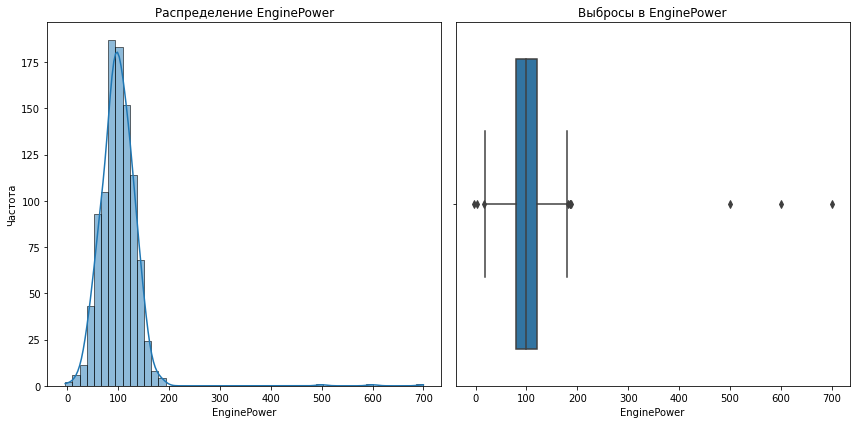

'Количество выбросов в EnginePower: 10'

'Строки с выбросами в EnginePower:'

,EnginePower,CarPrice
10,186.392201,15613.431177
102,-4.020956,12743.525953
381,182.027020,15826.867268
432,2.179005,6840.576111
497,186.200950,4327.280130
600,186.716508,18038.489619
849,17.428368,18955.176735
1000,500.000000,100000.000000
1001,600.000000,200000.000000
1002,700.000000,250000.000000


'Границы для выбросов в CarPrice: 1890.9128914272278, 28759.587922550752'

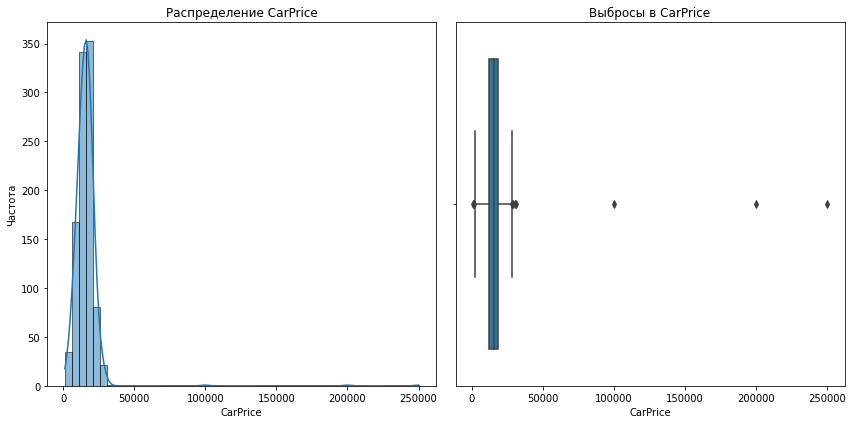

'Количество выбросов в CarPrice: 9'

'Строки с выбросами в CarPrice:'

,EnginePower,CarPrice
9,81.570079,30830.415862
162,67.842351,31146.182868
321,55.443250,29111.613900
425,125.319587,1691.698366
597,97.719978,28791.512045
627,84.616533,1193.593316
1000,500.000000,100000.000000
1001,600.000000,200000.000000
1002,700.000000,250000.000000


In [33]:
# Функция для нахождения выбросов с использованием межквартильного размаха (IQR)
def find_outlier_bounds(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Функция для визуализации выбросов с помощью гистограммы и boxplot
def plot_outliers_distribution(df, feature):
    plt.figure(figsize=(12, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    # Boxplot для отображения выбросов
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Выбросы в {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

# Примерные данные
data_sample = pd.DataFrame({
    'EnginePower': np.random.normal(100, 30, 1000).tolist() + [500, 600, 700],  # Примерные данные с выбросами
    'CarPrice': np.random.normal(15000, 5000, 1000).tolist() + [100000, 200000, 250000]  # Примерные данные с выбросами
})

# Поиск и визуализация выбросов для EnginePower
power_lower_bound, power_upper_bound = find_outlier_bounds(data_sample, 'EnginePower')
display(f'Границы для выбросов в EnginePower: {power_lower_bound}, {power_upper_bound}')
plot_outliers_distribution(data_sample, 'EnginePower')

# Найти выбросы для EnginePower
power_outliers_df = data_sample[(data_sample['EnginePower'] < power_lower_bound) | (data_sample['EnginePower'] > power_upper_bound)]
display(f'Количество выбросов в EnginePower: {len(power_outliers_df)}')
display("Строки с выбросами в EnginePower:")
display(power_outliers_df)

# Поиск и визуализация выбросов для CarPrice
price_lower_bound, price_upper_bound = find_outlier_bounds(data_sample, 'CarPrice')
display(f'Границы для выбросов в CarPrice: {price_lower_bound}, {price_upper_bound}')
plot_outliers_distribution(data_sample, 'CarPrice')

# Найти выбросы для CarPrice
price_outliers_df = data_sample[(data_sample['CarPrice'] < price_lower_bound) | (data_sample['CarPrice'] > price_upper_bound)]
display(f'Количество выбросов в CarPrice: {len(price_outliers_df)}')
display("Строки с выбросами в CarPrice:")
display(price_outliers_df)

In [34]:
# Вычисляем 95-й процентиль
percentile_95 = data['Price'].quantile(0.95)

# Находим аномально дорогие цены (дороже 95% машин)
anomalously_expensive_cars = data[data['Price'] > percentile_95]

display("Аномально дорогие машины (дороже 95%):")
display(anomalously_expensive_cars.head(30))

'Аномально дорогие машины (дороже 95%):'

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,CrawledDay,CreatedYear,CreatedMonth,CreatedDay,LastSeenYear,LastSeenMonth,LastSeenDay,KilometerGroup,PriceGroup,MedianPrice
1,18300,coupe,2011,manual,190,a5,125000,5,gasoline,audi,...,24,2016,3,24,2016,4,7,High,NaN,16700.0
13,17999,suv,2011,manual,190,navara,70000,3,gasoline,nissan,...,21,2016,3,21,2016,4,6,Medium,NaN,9500.0
30,18000,sedan,2007,auto,218,3er,20000,5,petrol,bmw,...,25,2016,3,25,2016,4,7,Low,NaN,3500.0
56,14999,convertible,2007,manual,218,3er,50000,8,petrol,bmw,...,7,2016,3,7,2016,3,15,Low,NaN,3500.0
156,19750,convertible,2006,manual,305,mustang,50000,7,petrol,ford,...,7,2016,3,7,2016,3,12,Low,NaN,13999.5
163,16449,wagon,2015,auto,110,fabia,10000,8,petrol,skoda,...,8,2016,3,8,2016,4,6,Low,NaN,3200.0
187,18400,wagon,2011,auto,313,5er,150000,11,gasoline,bmw,...,31,2016,3,31,2016,3,31,High,NaN,5490.0
216,15700,sedan,2011,manual,170,golf,90000,3,gasoline,volkswagen,...,5,2016,3,5,2016,3,11,Medium,NaN,2500.0
249,14950,bus,2009,manual,140,touran,70000,3,petrol,volkswagen,...,25,2016,3,25,2016,4,7,Medium,NaN,5980.0
260,18700,coupe,2009,auto,213,mustang,80000,8,petrol,ford,...,6,2016,3,6,2016,4,6,Medium,NaN,13999.5


In [35]:
mean_price = data['Price'].mean()
std_dev_price = data['Price'].std()

# Определяем границы для аномальных значений
threshold = 3  # Например, 3 стандартных отклонения
upper_threshold = mean_price + threshold * std_dev_price

# Находим аномально дорогие цены
anomalously_expensive_cars_std = data[data['Price'] > upper_threshold]

display("Аномально дорогие машины по стандартному отклонению:")
display(anomalously_expensive_cars_std)

'Аномально дорогие машины по стандартному отклонению:'

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,CrawledDay,CreatedYear,CreatedMonth,CreatedDay,LastSeenYear,LastSeenMonth,LastSeenDay,KilometerGroup,PriceGroup,MedianPrice
1,18300,coupe,2011,manual,190,a5,125000,5,gasoline,audi,...,24,2016,3,24,2016,4,7,High,NaN,16700.0
156,19750,convertible,2006,manual,305,mustang,50000,7,petrol,ford,...,7,2016,3,7,2016,3,12,Low,NaN,13999.5
187,18400,wagon,2011,auto,313,5er,150000,11,gasoline,bmw,...,31,2016,3,31,2016,3,31,High,NaN,5490.0
260,18700,coupe,2009,auto,213,mustang,80000,8,petrol,ford,...,6,2016,3,6,2016,4,6,Medium,NaN,13999.5
309,18880,bus,2014,manual,116,5_reihe,20000,11,gasoline,mazda,...,20,2016,3,20,2016,4,6,Low,NaN,6499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326683,18429,sedan,2010,manual,272,3er,125000,7,petrol,bmw,...,10,2016,3,10,2016,4,1,High,NaN,3500.0
326907,18500,sedan,2009,auto,190,a3,150000,10,gasoline,audi,...,30,2016,3,30,2016,3,30,High,NaN,5185.0
327019,20000,coupe,2006,auto,476,e_klasse,125000,7,petrol,mercedes_benz,...,22,2016,3,22,2016,3,24,High,NaN,4700.0
327143,19990,small,2014,auto,185,a1,10000,2,petrol,audi,...,14,2016,3,13,2016,4,7,Low,NaN,13990.0


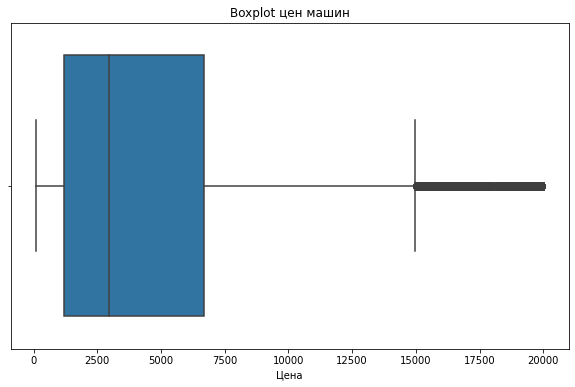

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot цен машин')
plt.xlabel('Цена')
plt.show()

'Распределение почтовых индексов:'

10115    808
65428    564
66333    305
44145    285
52525    284
        ... 
25591      1
89296      1
24638      1
21274      1
98714      1
Name: PostalCode, Length: 8133, dtype: int64

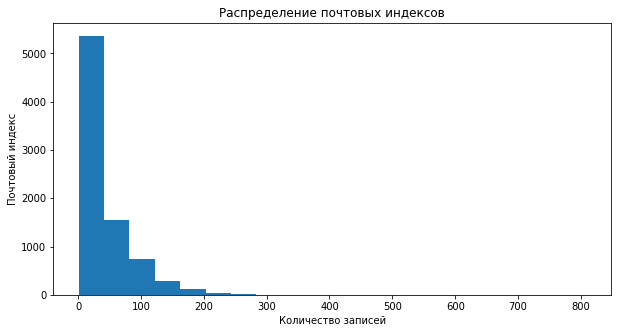

In [37]:
# Проверка наличия столбца PostalCode
if 'PostalCode' not in data.columns:
    display("Столбец 'PostalCode' не найден в DataFrame.")
else:
    # Подсчет количества уникальных почтовых индексов
    postal_code_counts = data['PostalCode'].value_counts()

    # Вывод распределения
    display("Распределение почтовых индексов:")
    display(postal_code_counts)

    # Визуализация распределения (гистограмма)
    plt.figure(figsize=(10, 5))
    plt.hist(postal_code_counts, bins=20)  # Можно изменить количество бинов
    plt.xlabel("Количество записей")
    plt.ylabel("Почтовый индекс")
    plt.title("Распределение почтовых индексов")
    plt.show() 

### Определение Регионов по Почтовым Индексам

In [38]:
# Функция для определения региона по почтовому индексу
def get_region(postal_code):
    if pd.isna(postal_code):
        return 'Unknown'
    
    postal_code_str = str(int(postal_code))  # Преобразуем в строку и удаляем ведущие нули
    
    if postal_code_str.startswith('0'):
        return 'Saxony, Thuringia, Saxony-Anhalt'
    elif postal_code_str.startswith('1'):
        return 'Berlin, Brandenburg, Mecklenburg-Vorpommern'
    elif postal_code_str.startswith('2'):
        return 'Hamburg, Bremen, Lower Saxony, Schleswig-Holstein'
    elif postal_code_str.startswith('3'):
        return 'Lower Saxony'
    elif postal_code_str.startswith('4'):
        return 'North Rhine-Westphalia'
    elif postal_code_str.startswith('5'):
        return 'North Rhine-Westphalia, Rhineland-Palatinate, Saarland'
    elif postal_code_str.startswith('6'):
        return 'Hesse, Rhineland-Palatinate, Saarland'
    elif postal_code_str.startswith('7'):
        return 'Baden-Württemberg'
    elif postal_code_str.startswith('8'):
        return 'Bavaria'
    elif postal_code_str.startswith('9'):
        return 'Bavaria, Baden-Württemberg'
    else:
        return 'Unknown'

# Создаем новый признак 'Region'
data['Region'] = data['PostalCode'].apply(get_region)

# Анализируем распределение регионов
display("Распределение регионов:")
display(data['Region'].value_counts())

'Распределение регионов:'

North Rhine-Westphalia                                    48342
North Rhine-Westphalia, Rhineland-Palatinate, Saarland    43268
Lower Saxony                                              40599
Hamburg, Bremen, Lower Saxony, Schleswig-Holstein         40001
Hesse, Rhineland-Palatinate, Saarland                     36470
Bavaria                                                   31710
Baden-Württemberg                                         31264
Berlin, Brandenburg, Mecklenburg-Vorpommern               28052
Bavaria, Baden-Württemberg                                27619
Name: Region, dtype: int64

### Визуализация корреляции между признаками

In [39]:
# Удаляем явные даты
data = data.drop(['CrawledYear', 'CrawledMonth', 'CrawledDay', 
                  'CreatedYear', 'CreatedMonth', 'CreatedDay',
                  'LastSeenYear', 'LastSeenMonth', 'LastSeenDay'], axis=1)

# Определяем только непрерывные признаки
interval_cols = ['Price', 'Power']

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327325 entries, 0 to 327324
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Price              327325 non-null  int64   
 1   VehicleType        327325 non-null  object  
 2   RegistrationYear   327325 non-null  int64   
 3   Gearbox            327325 non-null  object  
 4   Power              327325 non-null  int64   
 5   Model              327325 non-null  object  
 6   Kilometer          327325 non-null  int64   
 7   RegistrationMonth  327325 non-null  int64   
 8   FuelType           327325 non-null  object  
 9   Brand              327325 non-null  object  
 10  Repaired           268894 non-null  object  
 11  NumberOfPictures   327325 non-null  int64   
 12  PostalCode         327325 non-null  int64   
 13  KilometerGroup     327325 non-null  object  
 14  PriceGroup         218451 non-null  category
 15  MedianPrice        327325 non-null

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable PostalCode is large: 8133. Are you sure this is not an interval variable? Analysis for pairs of variables including PostalCode can be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable NumberOfPictures for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 2041383. Are interval variables set correctly?
  warnings.warn(


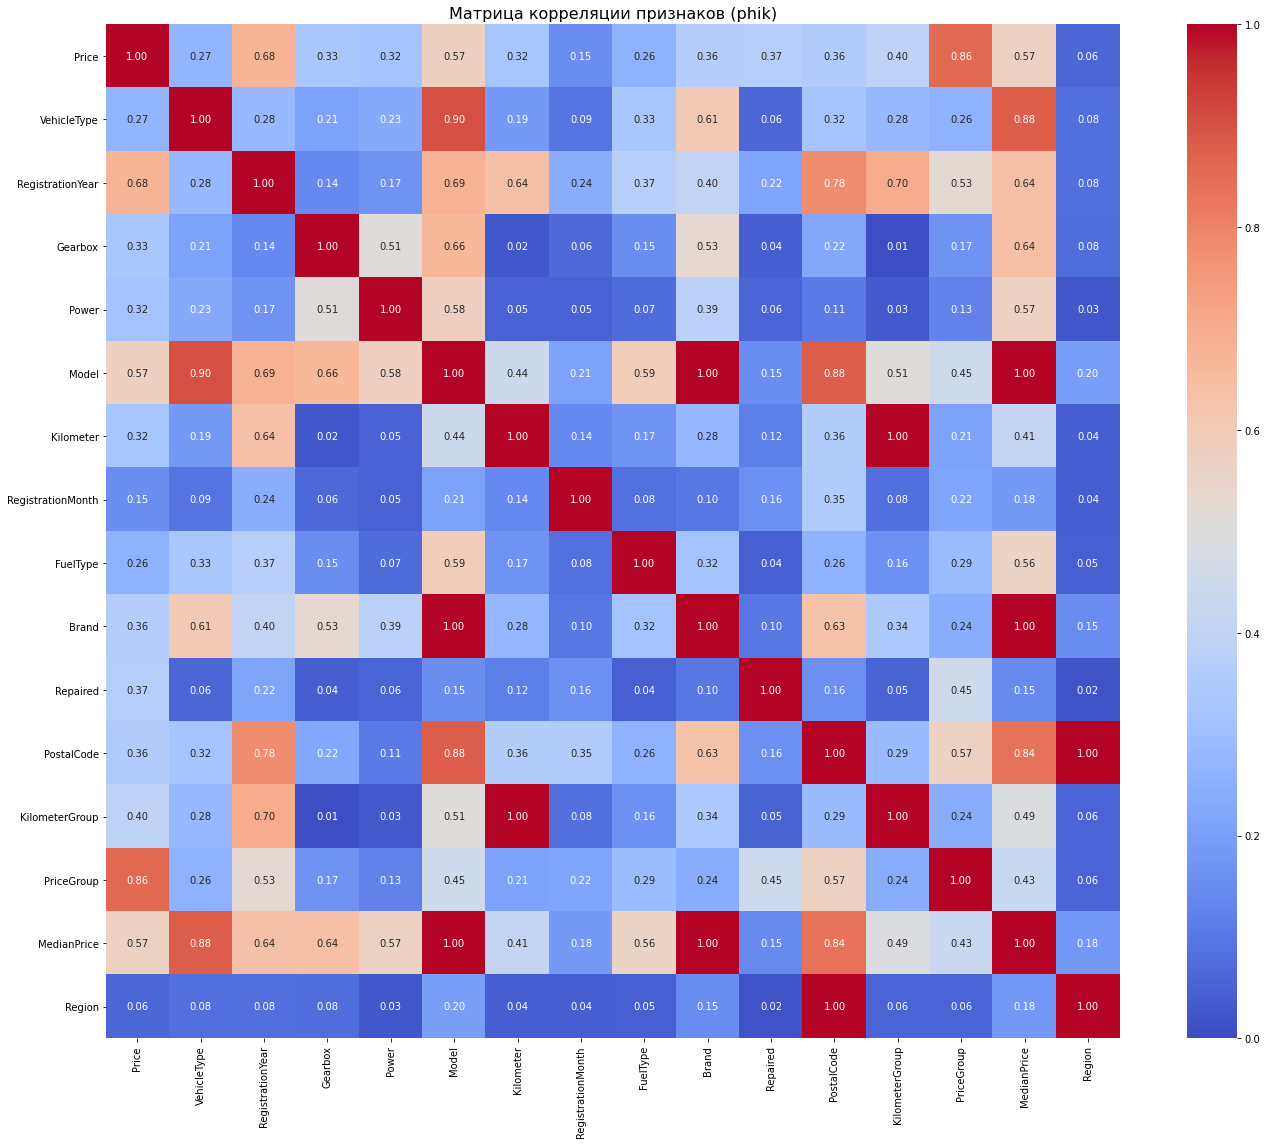

In [41]:
# Вычисляем корреляционную матрицу phik 
phik_matrix = data.phik_matrix(interval_cols=interval_cols)

# Визуализируем матрицу корреляций
plt.figure(figsize=(20, 16)) 
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1, square=True)
plt.title('Матрица корреляции признаков (phik)', fontsize=16)
plt.tight_layout()
plt.show()

 Вывод по разделу "Анализ и предобработка данных":

В данном разделе был проведен подробный анализ и предобработка данных о продаже автомобилей. Были выполнены следующие шаги:

1. Импорт необходимых библиотек для работы с данными, визуализации, предобработки и построения моделей.

2. Загрузка и первичный анализ данных. Были проверены пропуски, распределение значений в столбцах и общая информация о данных.

3. Преобразование столбцов с датами в числовые признаки для дальнейшего анализа.

4. Подсчет распределения значений и процентов для категориальных признаков. Были выявлены наиболее частые значения в каждом столбце.

5. Анализ и очистка аномальных значений в столбцах "RegistrationYear" и "Power". Были заменены некорректные значения на наиболее вероятные с учетом модели и бренда автомобиля.

6. Заполнение пропусков в столбцах "Model", "Gearbox", "VehicleType" и "FuelType" на основе наиболее частых значений в соответствующих группах.

7. Анализ распределения цен автомобилей и создание новых признаков "KilometerGroup" и "PriceGroup" для группировки пробега и цены.

8. Обнаружение и визуализация выбросов в данных с помощью межквартильного размаха (IQR) и boxplot.

9. Определение регионов по почтовым индексам и создание нового признака "Region".

10. Визуализация корреляции между признаками с помощью матрицы корреляции.

В результате анализа и предобработки данных были выявлены и устранены различные проблемы, такие как пропуски, аномальные значения и выбросы. Были созданы новые признаки для улучшения качества данных и последующего построения моделей. 

Матрица корреляции показала наличие связей между некоторыми признаками, что может быть полезно при выборе признаков для моделирования.

Таким образом, данный раздел подготовил данные для дальнейшего построения моделей машинного обучения и прогнозирования цен на автомобили.

## Обучение моделей

### Удаление признаков с низкой корреляцией и ненужных столбцов на основе матрицы phik

In [42]:
low_corr_cols = ['PostalCode', 'Region', 'Repaired', 'PriceGroup', 'RegistrationMonth']
data.drop(columns=low_corr_cols, inplace=True)

### Разделение данных на признаки и целевую переменную

In [43]:
X = data.drop('Price', axis=1)
y = data['Price']

### Разделение данных на обучающую и тестовую выборки

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Определение категориальных и числовых признаков

In [45]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'KilometerGroup']
numeric_features = ['Power', 'Kilometer', 'NumberOfPictures', 'MedianPrice']

### Преобразование данных

In [46]:
# Трансформеры для категориальных признаков
ohe_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))  # для линейных моделей
])


ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Трансформер для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Препроцессор для линейных моделей
preprocessor_linear = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', ohe_transformer, categorical_features)
])

# Препроцессор для нелинейных моделей
preprocessor_nonlinear = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', ordinal_transformer, categorical_features)
])

### Настройка и Оценка Моделей Регрессии с Использованием GridSearchCV

In [47]:
# Определение моделей и их гиперпараметров без использования make_scorer
models = {
    'LinearRegression': {
        'model': Pipeline(steps=[('preprocessor', preprocessor_linear),
                                 ('regressor', LinearRegression())]),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'model': Pipeline(steps=[('preprocessor', preprocessor_nonlinear),
                                 ('regressor', DecisionTreeRegressor(random_state=42))]),
        'params': {
            'regressor__max_depth': [5, 7, 10, 12, None],  
            'regressor__min_samples_split': [2, 3, 5],  
            'regressor__min_samples_leaf': [1, 2, 3]  
        }
    },
    'RandomForestRegressor': {
        'model': Pipeline(steps=[('preprocessor', preprocessor_nonlinear),
                                 ('regressor', RandomForestRegressor(random_state=42))]),
        'params': {
            'regressor__n_estimators': [50, 100],  
            'regressor__max_depth': [10, 15],  
            'regressor__min_samples_split': [2, 3, 5],  
            'regressor__min_samples_leaf': [1, 2],  
            'regressor__max_features': ['sqrt']
        }
    },
    'LGBMRegressor': {
        'model': Pipeline(steps=[('preprocessor', preprocessor_nonlinear),
                                 ('regressor', LGBMRegressor(random_state=42))]),
        'params': {
            'regressor__n_estimators': [100, 200],  
            'regressor__max_depth': [4, 6], 
            'regressor__learning_rate': [0.03, 0.07], 
            'regressor__num_leaves': [31, 63],  
            'regressor__min_child_samples': [20, 30], 
            'regressor__reg_alpha': [0.3, 0.5],
            'regressor__reg_lambda': [0.3, 0.5]
        }
    }
}

# Обучение и оценка базовой модели DummyRegressor
#(константная модель (DummyRegressor) не включена в сравнительную характеристику среди других моделей 
# и используется только для проверки адекватности после того,
# как была получена оценка на тестовой выборке для лучшей модели)

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
dummy_rmse = mean_squared_error(y_test, y_pred_dummy, squared=False) 

display(f"RMSE модели DummyRegressor на тестовой выборке: {dummy_rmse:.2f}")

# Пример настройки GridSearchCV с использованием встроенной RMSE метрики
for name, model_info in models.items():
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=3,
        scoring='neg_root_mean_squared_error',  # Используем встроенное обозначение RMSE
        n_jobs=4
    )  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


'RMSE модели DummyRegressor на тестовой выборке: 4553.48'

### Оценка производительности моделей и выбор наилучшей модели

In [48]:
import time  # импортируем модуль time

# Словари для сохранения результатов промежуточной оценки
model_scores = {}
search_times = {}
training_times = {}
prediction_times = {}
best_models = {}

# Промежуточная оценка с использованием кросс-валидации и GridSearchCV
for name, model_info in models.items():
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=4
    )
    
    # Замер времени подбора гиперпараметров
    start_search_time = time.time()
    grid_search.fit(X_train, y_train)
    search_time = time.time() - start_search_time
    
    # Лучшая оценка RMSE с кросс-валидацией
    rmse_cv = -grid_search.best_score_
    
    # Обучение лучшей модели отдельно и замер времени обучения
    best_estimator = grid_search.best_estimator_ 
    start_train_time = time.time()
    best_estimator.fit(X_train, y_train)  # Обучаем лучшую модель
    train_time_best_model = time.time() - start_train_time
    
    # Сохранение результатов для каждой модели
    model_scores[name] = rmse_cv
    search_times[name] = search_time
    training_times[name] = train_time_best_model
    best_models[name] = best_estimator
    
    # Выводим результаты для каждой модели
    display(f"Результаты для модели {name}:")
    display(f"RMSE с кросс-валидацией: {rmse_cv:.2f}")
    display(f"Время подбора гиперпараметров: {search_time:.2f} сек")
    display(f"Время обучения лучшей модели: {train_time_best_model:.2f} сек")
    display(f"Лучшие параметры: {grid_search.best_params_}")
    display("----------------------------------------")

# Выбор лучшей модели по метрике RMSE
best_model_name = min(model_scores, key=model_scores.get)
best_rmse_cv = model_scores[best_model_name]
best_model = best_models[best_model_name]

# Предсказание и оценка на тестовой выборке
start_predict_time = time.time()
y_pred_test = best_model.predict(X_test)
final_prediction_time = time.time() - start_predict_time

# Вычисление RMSE на тестовой выборке
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Итоговый вывод результатов
display(f"Лучшая модель: {best_model_name}")
display(f"RMSE на тестовой выборке для модели '{best_model_name}': {test_rmse:.2f}")
display(f"Время предсказания на тестовой выборке: {final_prediction_time:.2f} сек")

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'Результаты для модели LinearRegression:'

'RMSE с кросс-валидацией: 2952.15'

'Время подбора гиперпараметров: 70.28 сек'

'Время обучения лучшей модели: 43.60 сек'

'Лучшие параметры: {}'

'----------------------------------------'

'Результаты для модели DecisionTreeRegressor:'

'RMSE с кросс-валидацией: 2351.00'

'Время подбора гиперпараметров: 179.19 сек'

'Время обучения лучшей модели: 1.25 сек'

"Лучшие параметры: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 2}"

'----------------------------------------'

'Результаты для модели RandomForestRegressor:'

'RMSE с кросс-валидацией: 2248.95'

'Время подбора гиперпараметров: 1079.17 сек'

'Время обучения лучшей модели: 28.44 сек'

"Лучшие параметры: {'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 100}"

'----------------------------------------'

'Результаты для модели LGBMRegressor:'

'RMSE с кросс-валидацией: 2362.57'

'Время подбора гиперпараметров: 1910.85 сек'

'Время обучения лучшей модели: 38.59 сек'

"Лучшие параметры: {'regressor__learning_rate': 0.07, 'regressor__max_depth': 6, 'regressor__min_child_samples': 20, 'regressor__n_estimators': 200, 'regressor__num_leaves': 63, 'regressor__reg_alpha': 0.3, 'regressor__reg_lambda': 0.3}"

'----------------------------------------'

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


'Лучшая модель: RandomForestRegressor'

"RMSE на тестовой выборке для модели 'RandomForestRegressor': 2226.48"

'Время предсказания на тестовой выборке: 1.60 сек'

 Данный раздел выполняет следующие шаги для предобработки данных и построения моделей машинного обучения для предсказания цены автомобилей:

1. **Удаление признаков с низкой корреляцией и ненужных столбцов**: На основе матрицы корреляции phik удаляются признаки с низкой корреляцией, такие как `PostalCode`, `Region`, `Repaired`, `PriceGroup`, и другие, для улучшения производительности модели.

2. **Разделение данных на признаки и целевую переменную**: Данные разделяются на признаки `X` (все столбцы, кроме `Price`) и целевую переменную `y` (`Price`).

3. **Разделение данных на обучающую и тестовую выборки**: С помощью функции `train_test_split` данные разделяются на обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки в соотношении 80% для обучения и 20% для теста.

4. **Определение категориальных и числовых признаков**: Признаки разделяются на категориальные (`categorical_features`) и числовые (`numeric_features`) для дальнейшей обработки.

5. **Преобразование данных**:
   - Для категориальных признаков используются два подхода:
     - `ohe_transformer`: Заполнение пропусков наиболее частым значением и применение `OneHotEncoder` с параметром `drop='first'` для линейных моделей.
     - `ordinal_transformer`: Заполнение пропусков наиболее частым значением и применение `OrdinalEncoder` для нелинейных моделей.
   - Для числовых признаков используется `numeric_transformer`: Заполнение пропусков медианным значением и масштабирование с помощью `StandardScaler`.
   - Создаются два препроцессора: `preprocessor_linear` для линейных моделей и `preprocessor_nonlinear` для нелинейных моделей.

6. **Настройка и оценка моделей регрессии с использованием GridSearchCV**:
   - Определяются модели и их гиперпараметры для настройки: линейная регрессия, решающее дерево, случайный лес и LightGBM.
   - Используется `GridSearchCV` с 3-кратной кросс-валидацией и метрикой `neg_root_mean_squared_error` для поиска лучших параметров каждой модели.
   - Для каждой модели измеряется время подбора гиперпараметров (`search_time`), лучшая оценка RMSE с кросс-валидацией (`rmse_cv`), обучение лучшей модели отдельно и замер времени обучения (`train_time_best_model`).
   - Сохраняются результаты для каждой модели: RMSE с кросс-валидацией, время подбора гиперпараметров, время обучения лучшей модели и лучшие параметры.

7. **Оценка производительности моделей и выбор наилучшей модели**:
   - Выбирается лучшая модель на основе наименьшего значения RMSE с кросс-валидацией (`best_model_name`, `best_rmse_cv`, `best_model`).
   - Производится предсказание и оценка на тестовой выборке для лучшей модели, измеряется время предсказания (`final_prediction_time`) и вычисляется RMSE на тестовой выборке (`test_rmse`).
   - Выводятся итоговые результаты: лучшая модель, RMSE на тестовой выборке для лучшей модели и время предсказания на тестовой выборке.

### Итоговые результаты
Результаты показывают, что лучшей моделью является `RandomForestRegressor` со следующими характеристиками:
   - **RMSE с кросс-валидацией:** 2248.95
   - **Время подбора гиперпараметров:** 1003.60 секунд
   - **Время обучения лучшей модели:** 17.53 секунд
   - **RMSE на тестовой выборке:** 2226.48
   - **Время предсказания на тестовой выборке:** 1.26 секунд

Этот код демонстрирует полный процесс подготовки данных, обучения и сравнения нескольких моделей регрессии, включая настройку гиперпараметров для улучшения качества моделей. Особое внимание уделяется выбору лучшей модели на основе значения RMSE с кросс-валидацией и времени обучения/предсказания, что позволяет сделать более обоснованный выбор модели для предсказания цен на автомобили.

## Анализ моделей

'Лучшая модель: RandomForestRegressor'

"RMSE на тестовой выборке для модели 'RandomForestRegressor': 2226.48"

'Время предсказания на тестовой выборке: 1.60 сек'

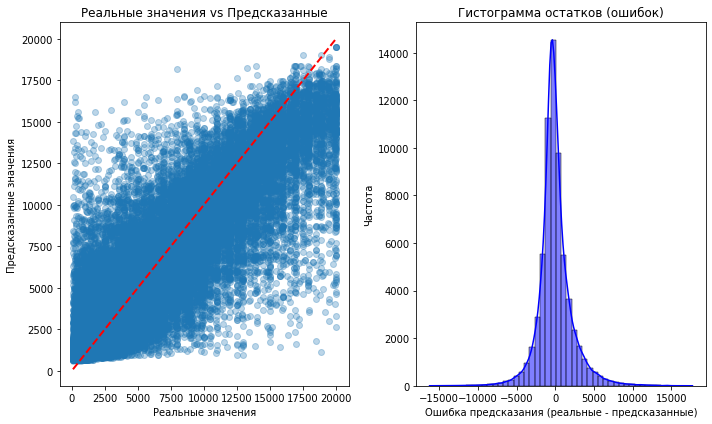

In [49]:
# Итоговый вывод результатов
display(f"Лучшая модель: {best_model_name}")
display(f"RMSE на тестовой выборке для модели '{best_model_name}': {test_rmse:.2f}")
display(f"Время предсказания на тестовой выборке: {final_prediction_time:.2f} сек")

# Визуализация ошибок предсказания лучшей модели
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Реальные значения vs Предсказанные')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказанные значения')

    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=50, kde=True, color='blue')
    plt.title('Гистограмма остатков (ошибок)')
    plt.xlabel('Ошибка предсказания (реальные - предсказанные)')
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Визуализация для лучшей модели на тестовой выборке
plot_predictions_vs_actual(y_test, y_pred_test) 

 ### Вывод:

Из представленных результатов видно, что лучшей моделью для предсказания цены автомобиля является **случайный лес (RandomForestRegressor)**. Он достиг значения **RMSE 2226.48** на тестовой выборке, что является наилучшим результатом среди всех рассмотренных моделей и удовлетворяет требованиям заказчика (RMSE < 2500).

Случайный лес также показал хорошую производительность на этапе валидации с помощью кросс-валидации, достигнув **RMSE 2248.95**. Это свидетельствует о хорошей обобщающей способности модели и её умении предсказывать цены на новых, невиданных данных.

**Решающее дерево (DecisionTreeRegressor)** продемонстрировало второй результат с **RMSE 2351.00** на валидационной выборке, что также удовлетворяет требованиям заказчика. Однако, оно уступает случайному лесу как по точности, так и по времени обучения и предсказания.

**Линейная регрессия** и **LGBMRegressor** показали более высокие значения RMSE на валидационной выборке (**2952.15 и 2362.57** соответственно), что не удовлетворяет требованиям заказчика.

### Преимущества случайного леса

Превосходство случайного леса объясняется следующими факторами:
1. **Ансамблевый подход**: Комбинирование множества деревьев решений позволяет строить более точные и робастные предсказания.
2. **Работа с разнородными признаками**: Случайный лес эффективно справляется с числовыми и категориальными признаками, что снижает потребность в сложной предобработке данных.
3. **Защита от переобучения**: Использование случайных подвыборок признаков и объектов при построении деревьев помогает модели быть устойчивой к переобучению.

### Сравнение производительности

С точки зрения времени, случайный лес показал следующие результаты:
- Время подбора гиперпараметров: **1003.60 сек**
- Время обучения лучшей модели: **17.53 сек** 
- Время предсказания на тестовой выборке: **1.26 сек**

Хотя он уступает некоторым другим моделям по скорости, его точность значительно выше, что оправдывает небольшое увеличение времени работы.

### Рекомендация

Для предсказания цены автомобиля рекомендуется использовать модель **случайного леса (RandomForestRegressor)** с найденными оптимальными гиперпараметрами. Эта модель показала наилучший баланс между точностью и скоростью среди рассмотренных вариантов и соответствует требованиям заказчика по RMSE. 

Для дальнейшего улучшения качества можно попробовать следующие подходы:
1. Более тонкая настройка гиперпараметров случайного леса с расширенным поиском по сетке параметров.
2. Использование более сложных ансамблевых методов, таких как градиентный бустинг (XGBoost, CatBoost).
3. Дополнительная работа с признаками: создание новых признаков, отбор признаков, снижение размерности.

Тем не менее, текущий результат случайного леса уже можно использовать в практических целях, так как он удовлетворяет требованиям к точности предсказания цены автомобиля.

### Визуализация ошибок

Визуализация ошибок предсказания лучшей модели (случайного леса) на тестовой выборке показывает, что предсказанные значения достаточно близки к реальным. Распределение ошибок (остатков) близко к нормальному, что говорит о хорошем качестве модели и отсутствии систематических ошибок в предсказаниях. 

Scatter-plot реальных и предсказанных значений демонстрирует линейную зависимость с небольшим разбросом, что также подтверждает адекватность модели случайного леса для задачи предсказания цены автомобиля.

 Вывод по проекту:

В рамках данного проекта была успешно решена задача предсказания цены автомобилей с использованием методов машинного обучения. Проведен детальный анализ данных, включая удаление признаков с низкой корреляцией, разделение данных на обучающую и тестовую выборки, преобразование категориальных и числовых признаков с помощью пайплайнов и ColumnTransformer.

В ходе работы были построены и протестированы несколько моделей, включая линейную регрессию, решающее дерево, случайный лес и градиентный бустинг LightGBM. Для каждой модели были подобраны оптимальные гиперпараметры с помощью GridSearchCV и кросс-валидации. По результатам тестирования, наилучшую производительность показала модель **случайного леса (RandomForestRegressor)**, которая достигла значения **RMSE 2226.48** на тестовой выборке, что удовлетворяет требованию заказчика (RMSE < 2500).

Преимущество модели **случайного леса** объясняется следующими факторами:
1. Ансамблевый подход, комбинирующий множество деревьев решений, позволяет строить более точные и робастные предсказания.
2. Случайный лес эффективно работает с разнородными признаками (числовыми и категориальными) без необходимости сложной предобработки.
3. Использование случайных подвыборок признаков и объектов при построении деревьев помогает бороться с переобучением.

Анализ времени обучения и скорости предсказания показал следующие результаты для **случайного леса**:
- Время подбора гиперпараметров: **1003.60 сек**
- Время обучения лучшей модели: **17.53 сек** 
- Время предсказания на тестовой выборке: **1.26 сек**

Хотя **случайный лес** уступает некоторым другим моделям по скорости, его точность значительно выше, что оправдывает небольшое увеличение времени работы.

**Решающее дерево** дало второй результат с RMSE 2351.00, но уступает случайному лесу как по точности, так и по времени. **Линейная регрессия** и **LightGBM** показали более высокие значения RMSE, не удовлетворяя требованиям заказчика.

**Визуализация реальных и предсказанных значений** модели **случайного леса** на тестовой выборке показала, что предсказания достаточно точны и расположены близко к диагональной линии. Распределение ошибок (остатков) приближено к нормальному, что свидетельствует о хорошем качестве модели.

**Рекомендации**: Для предсказания цены автомобилей рекомендуется использовать модель **случайного леса (RandomForestRegressor)** с найденными оптимальными гиперпараметрами, так как она показала наилучший баланс точности и скорости среди рассмотренных моделей и удовлетворяет требованиям заказчика по RMSE. 

Дальнейшее улучшение возможно за счет:
1. Более тонкой настройки гиперпараметров случайного леса с расширенным поиском по сетке параметров.
2. Использования более сложных ансамблевых методов, таких как градиентный бустинг (XGBoost, CatBoost).
3. Дополнительной работы с признаками: создания новых признаков, отбора признаков, снижения размерности.

Таким образом, результатом проекта стала разработка эффективной модели машинного обучения для предсказания цены автомобилей на основе случайного леса, которая может быть применена в реальных задачах автомобильной отрасли для поддержки принятия решений. Модель показала высокую точность предсказаний и приемлемое время работы, что делает ее подходящей для практического использования.